In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cycler, math


from datetime import datetime, timedelta
%matplotlib inline
%config InlineBackend.figure_format='retina'

### Load aggregated data

In [4]:
#LINKUSDT #DASHUSDT #THETAUSDT #BNBUSDT
#symbols = ['ADAUSDT', 'BTCUSDT', 'BNBUSDT', 'DASHUSDT', 'ETHUSDT', 'LINKUSDT', 'LTCUSDT', 'NANOUSDT', 'THETAUSDT', 'XRPUSDT']
symbols = ['ADAUSDT', 'BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']
symbs, dfs = [], []

for symbol in symbols:
    print(symbol[:-4], end=' ')
    symbs.append(symbol[:-4])
    df = pd.read_parquet('data.nosync/_aggreg/'+symbol+'.pq')
    print(df.shape, end=' - ')
    dfs.append(df)

ADA (3876151, 6) - BTC (6466922, 6) - ETH (6404237, 6) - LTC (4975254, 6) - NANO (535838, 6) - XRP (4744723, 6) - 

In [393]:
dfs[0].tail()

is_buyer_maker  nb_trade  min_price  max_price  \
timestamp                                                             
2020-12-28 23:59:00            True        82    0.17651    0.17696   
2020-12-28 23:59:30           False        52    0.17632    0.17665   
2020-12-28 23:59:30            True        92    0.17625    0.17661   
2020-12-29 00:00:00           False        54    0.17632    0.17653   
2020-12-29 00:00:00            True        64    0.17622    0.17648   

                     mid_price  volume_tot  
timestamp                                   
2020-12-28 23:59:00   0.176762    342421.6  
2020-12-28 23:59:30   0.176513    128112.1  
2020-12-28 23:59:30   0.176487    231553.1  
2020-12-29 00:00:00   0.176437    308284.8  
2020-12-29 00:00:00   0.176354    189729.6

`is_buyer_maker = True` $\rightarrow$ a buyer has taken the ask price $\rightarrow$ `trade_price = ask_price`
### Join data 

In [394]:
dfs_ = []
for df in dfs:
    df['mid_price'] = df['mid_price'].groupby('timestamp').mean() #group mid_price
    df['max_price'] = df['max_price'].groupby('timestamp').max() #group max_price
    df['min_price'] = df['min_price'].groupby('timestamp').min() #group min_price
    df['nb_trade'] = df['nb_trade'].groupby('timestamp').sum() #group nb_trade
    df['volume_tot'] = df['volume_tot'].groupby('timestamp').sum() #group volume_tot
    df = df.groupby(df.index).first()[['nb_trade', 'min_price', 'max_price', 'mid_price', 'volume_tot']]
    df['mid_price_return']=df.mid_price.pct_change()
    df['mid_price_log_return']=np.log(1+df.mid_price_return)
    dfs_.append(df)
dfs = dfs_

In [395]:
dfs[1].tail()

nb_trade  min_price  max_price     mid_price  volume_tot  \
timestamp                                                                       
2020-12-28 23:58:00       381   27082.96   27117.87  27094.779692   14.299208   
2020-12-28 23:58:30       495   27064.71   27091.41  27081.862148   16.102140   
2020-12-28 23:59:00       401   27056.26   27098.06  27080.409046   18.669730   
2020-12-28 23:59:30       515   27067.25   27085.72  27073.863382   13.667518   
2020-12-29 00:00:00       463   27070.48   27097.32  27083.227665   20.287791   

                     mid_price_return  mid_price_log_return  
timestamp                                                    
2020-12-28 23:58:00         -0.000641             -0.000641  
2020-12-28 23:58:30         -0.000477             -0.000477  
2020-12-28 23:59:00         -0.000054             -0.000054  
2020-12-28 23:59:30         -0.000242             -0.000242  
2020-12-29 00:00:00          0.000346              0.000346

### Group every cryptos

In [396]:
data = pd.concat(dfs, keys=symbols)
display(data.head())
display(data.tail())

nb_trade  min_price  max_price  mid_price  \
        timestamp                                                        
ADAUSDT 2018-07-25 00:00:30        57    0.17264    0.17360   0.173046   
        2018-07-25 00:01:00        51    0.17250    0.17315   0.172807   
        2018-07-25 00:01:30        54    0.17315    0.17409   0.173655   
        2018-07-25 00:02:00        34    0.17348    0.17427   0.173963   
        2018-07-25 00:02:30        21    0.17338    0.17409   0.173849   

                             volume_tot  mid_price_return  \
        timestamp                                           
ADAUSDT 2018-07-25 00:00:30    106654.5               NaN   
        2018-07-25 00:01:00    150228.9         -0.001379   
        2018-07-25 00:01:30    201772.1          0.004906   
        2018-07-25 00:02:00    229974.3          0.001775   
        2018-07-25 00:02:30     69785.5         -0.000657   

                             mid_price_log_return  
        timestamp                                  
ADAUSDT 2018-07-25 00:00:30                   NaN  
        2018-07-25 00:01:00             -0.001380  
        2018-07-25 00:01:30              0.004894  
        2018-07-25 00:02:00              0.001773  
        2018-07-25 00:02:30             -0.000658

nb_trade  min_price  max_price  mid_price  \
        timestamp                                                        
XRPUSDT 2020-12-28 23:58:00       226    0.24715    0.24767   0.247428   
        2020-12-28 23:58:30       455    0.24730    0.24900   0.248221   
        2020-12-28 23:59:00       594    0.24880    0.25000   0.249557   
        2020-12-28 23:59:30       740    0.24907    0.25037   0.249711   
        2020-12-29 00:00:00       745    0.24703    0.24978   0.248673   

                             volume_tot  mid_price_return  \
        timestamp                                           
XRPUSDT 2020-12-28 23:58:00    466790.8          0.001605   
        2020-12-28 23:58:30    815260.4          0.003203   
        2020-12-28 23:59:00   2022689.1          0.005384   
        2020-12-28 23:59:30   1599980.6          0.000616   
        2020-12-29 00:00:00   2053989.4         -0.004156   

                             mid_price_log_return  
        timestamp                                  
XRPUSDT 2020-12-28 23:58:00              0.001604  
        2020-12-28 23:58:30              0.003198  
        2020-12-28 23:59:00              0.005369  
        2020-12-28 23:59:30              0.000615  
        2020-12-29 00:00:00             -0.004165

### General plot of 30 seconds returns / price

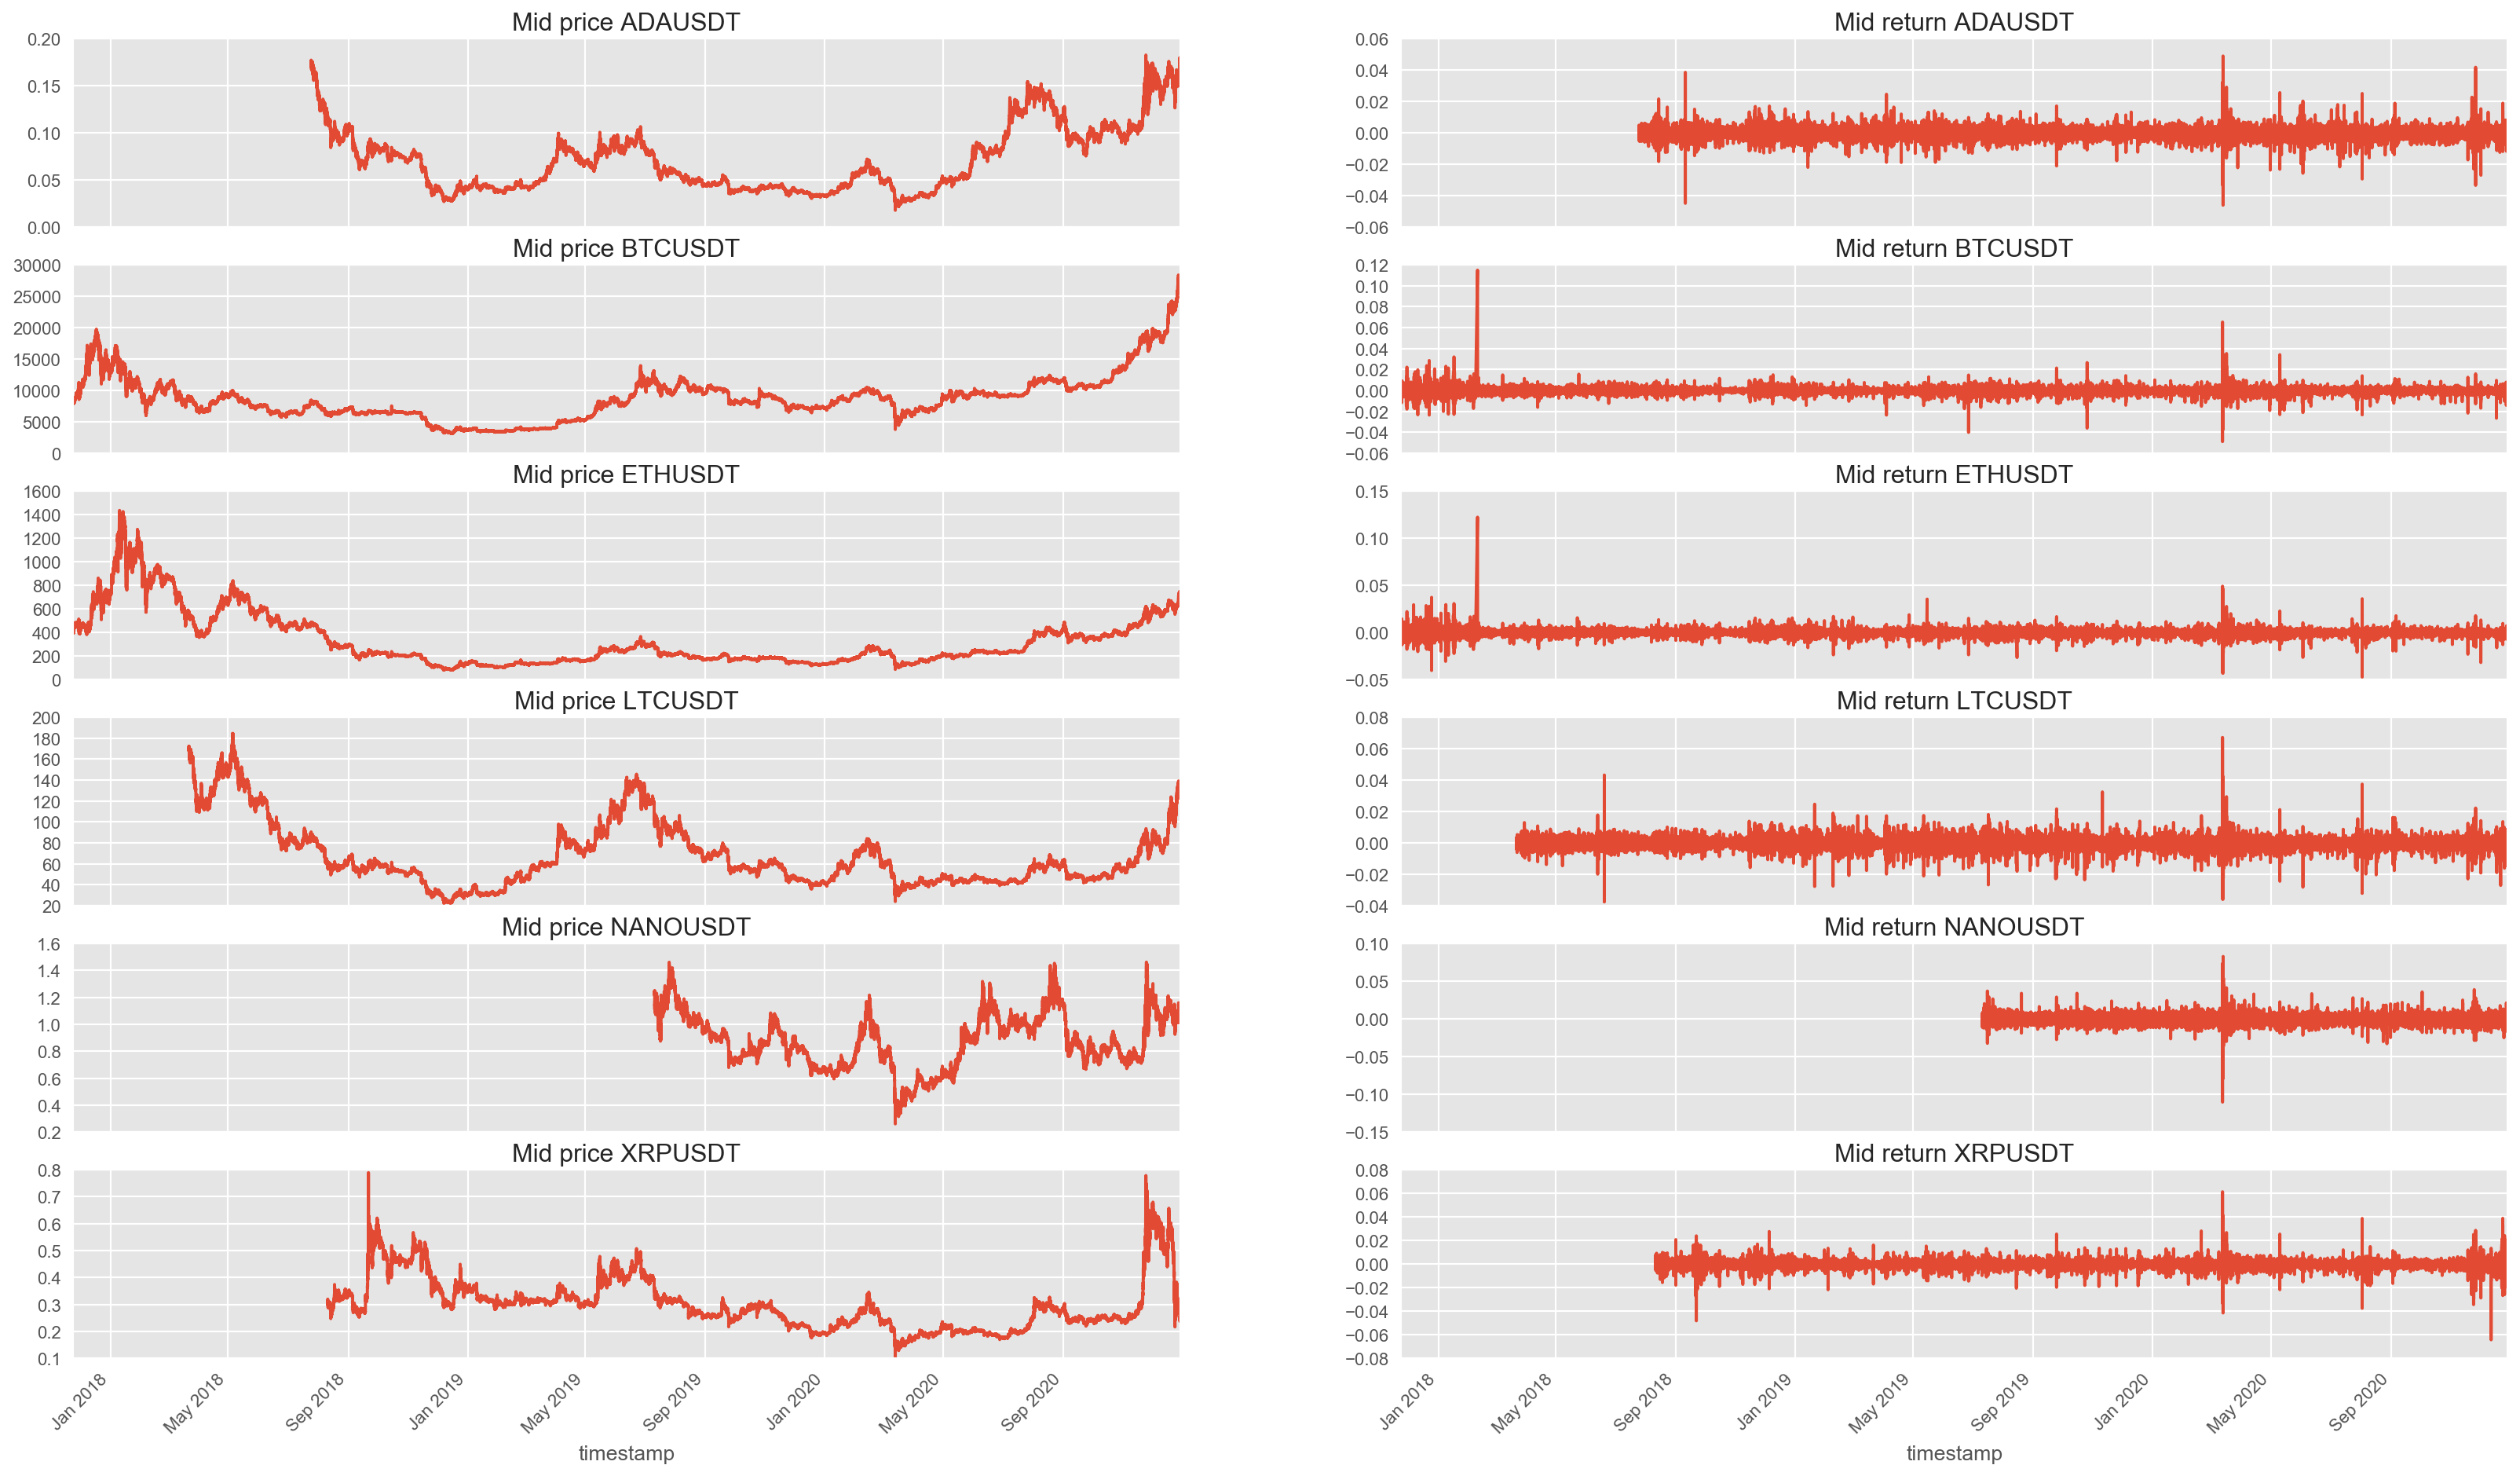

======= ADAUSDT =======
Annualized estimated mean simple return is 27.085
Annualized estimated simple return std deviation is 0.670
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.018

======= BTCUSDT =======
Annualized estimated mean simple return is 3202849.840
Annualized estimated simple return std deviation is 68653.391
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.014

======= ETHUSDT =======
Annualized estimated mean simple return is 120243.305
Annualized estimated simple return std deviation is 4385.331
Annualized estimated mean log-return is 0.000
Annualized estimated log-return std deviation is 0.016

======= LTCUSDT =======
Annualized estimated mean simple return is 24595.593
Annualized estimated simple return std deviation is 572.982
Annualized estimated mean log-return is -0.000
Annualized estimated log-return std deviation is 0.017

======= NANOUSDT =======
Annualized estima

In [431]:
#Plot time series
fig, ax = plt.subplots(len(symbols),2, figsize= (50,20), sharex=True)
for i, coin in enumerate(symbols):
    #Retreive coin specific data
    data_plot = data.iloc[data.index.get_level_values(0) == coin]
    #Get index date fro x axis
    data_plot.index = data_plot.index.get_level_values(1)
    
    #Plot the close price
    data_plot['mid_price'].plot(figsize=(25, 15),
                            title='Mid price ' + coin,
                            ax=ax[i, 0], 
                            rot=45)
    #Plot the return
    data_plot['mid_price_return'].plot(figsize=(25, 15), 
                             title='Mid return ' + coin,
                             ax=ax[i, 1], rot=45 )
plt.savefig('images/intro/Mid price and Mid Return.png', dpi=300)
plt.show()

#Print the annualized mean and std. deviation of log-returns
dt=1.0/365.0
sdt=np.sqrt(dt)
for i, coin in enumerate(symbols):
    data_temp = data.iloc[data.index.get_level_values(0) == coin]
    print("======= " + coin + " =======")
    print('Annualized estimated mean simple return is {:05.3f}'.format(np.mean(data_temp['mid_price'])/dt))
    print('Annualized estimated simple return std deviation is {:05.3f}'.format(np.std(data_temp['mid_price'])/sdt))
    print('Annualized estimated mean log-return is {:05.3f}'.format(np.mean(data_temp['mid_price_log_return'])/dt))
    print('Annualized estimated log-return std deviation is {:05.3f}\n'.format(np.std(data_temp['mid_price_log_return'])/sdt))



In [398]:
returns = data.unstack(level=0)[['mid_price']]
display(returns.head())
display(returns.shape)

mid_price                                            \
                      ADAUSDT      BTCUSDT     ETHUSDT LTCUSDT NANOUSDT   
timestamp                                                                 
2017-11-24 00:00:30       NaN  8002.583583  404.943269     NaN      NaN   
2017-11-24 00:01:00       NaN  8014.383542  404.020000     NaN      NaN   
2017-11-24 00:01:30       NaN  8022.228000  406.002500     NaN      NaN   
2017-11-24 00:02:00       NaN  8011.573333  406.258333     NaN      NaN   
2017-11-24 00:02:30       NaN  8010.548333  407.007000     NaN      NaN   

                             
                    XRPUSDT  
timestamp                    
2017-11-24 00:00:30     NaN  
2017-11-24 00:01:00     NaN  
2017-11-24 00:01:30     NaN  
2017-11-24 00:02:00     NaN  
2017-11-24 00:02:30     NaN

(3240931, 6)

### Group data with differrent interesting intervals

In [629]:
returns_30s = returns.groupby([pd.Grouper(freq='30s', origin=0, label='right')]).last()

returns_30s[symbols]=returns_30s.mid_price.pct_change()
returns_30s.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_30s.shape

(3257280, 12)

In [399]:
returns_1m = returns.groupby([pd.Grouper(freq='1min', origin=0, label='right')]).last()

returns_1m[symbols]=returns_1m.mid_price.pct_change()
returns_1m.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1m.shape

(1628641, 12)

In [400]:
returns_1h = returns.groupby([pd.Grouper(freq='1h', origin=0, label='right')]).last()

returns_1h[symbols]=returns_1h.mid_price.pct_change()
returns_1h.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1h.shape

(27145, 12)

In [401]:
returns_1d = returns.groupby([pd.Grouper(freq='1d', origin=0, label='right')]).last()

returns_1d[symbols]=returns_1d.mid_price.pct_change()
returns_1d.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1d.shape

(1132, 12)

In [402]:
returns_1w = returns.groupby([pd.Grouper(freq='7d', origin=0, label='right')]).last()

returns_1w[symbols]=returns_1w.mid_price.pct_change()
returns_1w.columns = pd.MultiIndex.from_product([['mid_price', 'mid_return'], symbols], names=['Feature', 'Symbol'])
returns_1w.shape

(162, 12)

In [403]:
returns_1w.mid_return.rolling(window=31,min_periods=31).corr()

Symbol                ADAUSDT   BTCUSDT   ETHUSDT   LTCUSDT  NANOUSDT  \
timestamp  Symbol                                                       
2017-11-30 ADAUSDT        NaN       NaN       NaN       NaN       NaN   
           BTCUSDT        NaN       NaN       NaN       NaN       NaN   
           ETHUSDT        NaN       NaN       NaN       NaN       NaN   
           LTCUSDT        NaN       NaN       NaN       NaN       NaN   
           NANOUSDT       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2020-12-31 BTCUSDT   0.383534  1.000000  0.686054  0.883262  0.293334   
           ETHUSDT   0.681000  0.686054  1.000000  0.706089  0.489601   
           LTCUSDT   0.479520  0.883262  0.706089  1.000000  0.298211   
           NANOUSDT  0.565758  0.293334  0.489601  0.298211  1.000000   
           XRPUSDT   0.564198  0.165025  0.510256  0.267471  0.704273   

Symbol                XRPUSDT  
timestamp  Symbol              
2017-11-30 ADAUSDT        NaN  
           BTCUSDT        NaN  
           ETHUSDT        NaN  
           LTCUSDT        NaN  
           NANOUSDT       NaN  
...                       ...  
2020-12-31 BTCUSDT   0.165025  
           ETHUSDT   0.510256  
           LTCUSDT   0.267471  
           NANOUSDT  0.704273  
           XRPUSDT   1.000000  

[972 rows x 6 columns]

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2020-12-28 21:00:00  0.589602  0.517713  0.707484  0.292117  0.348722
2020-12-28 22:00:00  0.608420  0.714095  0.772475  0.444824  0.393571
2020-12-28 23:00:00  0.622089  0.702985  0.766456  0.357189  0.092342
2020-12-29 00:00:00  0.617979  0.706586  0.751262  0.359476  0.127338
2020-12-29 01:00:00  0.599935  0.699088  0.744615  0.314097  0.105018

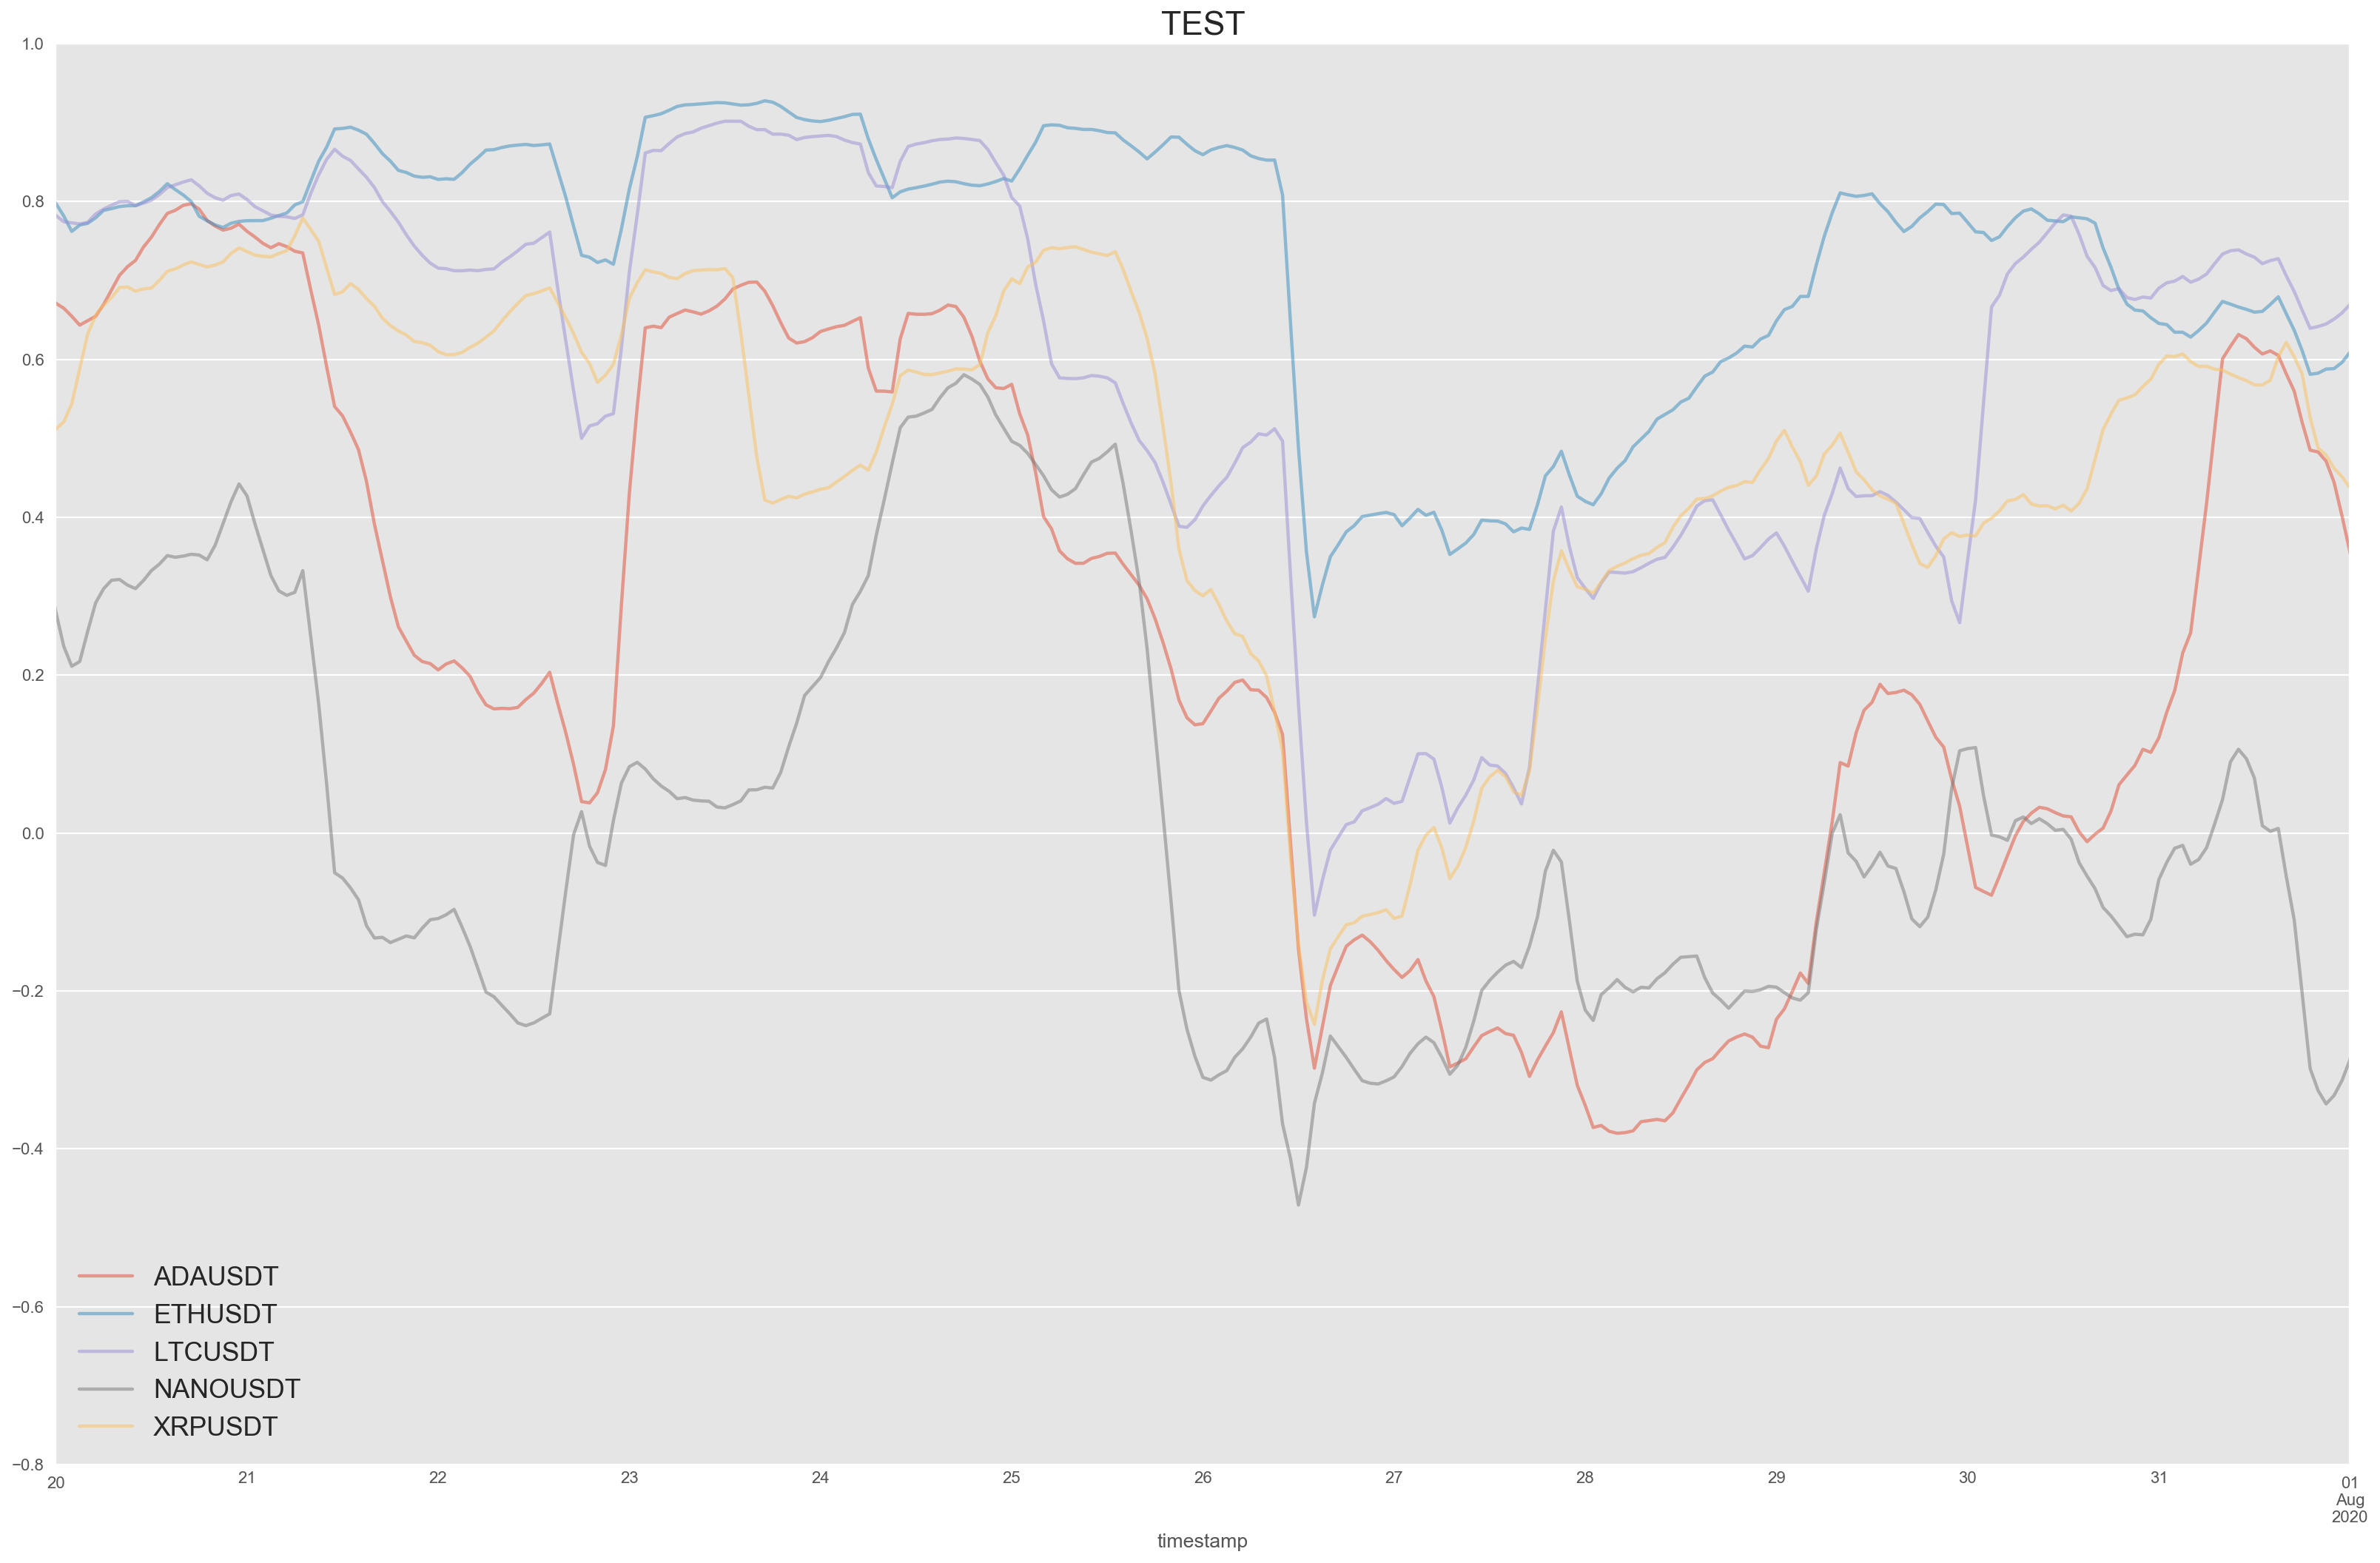

In [463]:
ts_corr = returns_1m.mid_return.rolling(window=31,min_periods=7).corr()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')

title='TEST'
btc_corr.rolling(window=60*24*20,min_periods=7).mean().plot(figsize=(25, 15), linewidth=2, alpha=0.5)
#btc_corr.plot(figsize=(25, 15), linewidth=2, alpha=0.5)
plt.title(title, fontsize=20)
plt.legend(loc=0, prop={'size': 16})
plt.xlim(left=datetime(2019, 1, 1), right=datetime(2021, 1, 1))
#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2020-12-28 21:00:00  0.603605  0.633963  0.769948  0.367198  0.456446
2020-12-28 22:00:00  0.590932  0.631983  0.765653  0.359023  0.452848
2020-12-28 23:00:00  0.589369  0.628696  0.763807  0.348005  0.430207
2020-12-29 00:00:00  0.592703  0.623910  0.758989  0.340610  0.429879
2020-12-29 01:00:00  0.593645  0.623488  0.759048  0.337945  0.428780

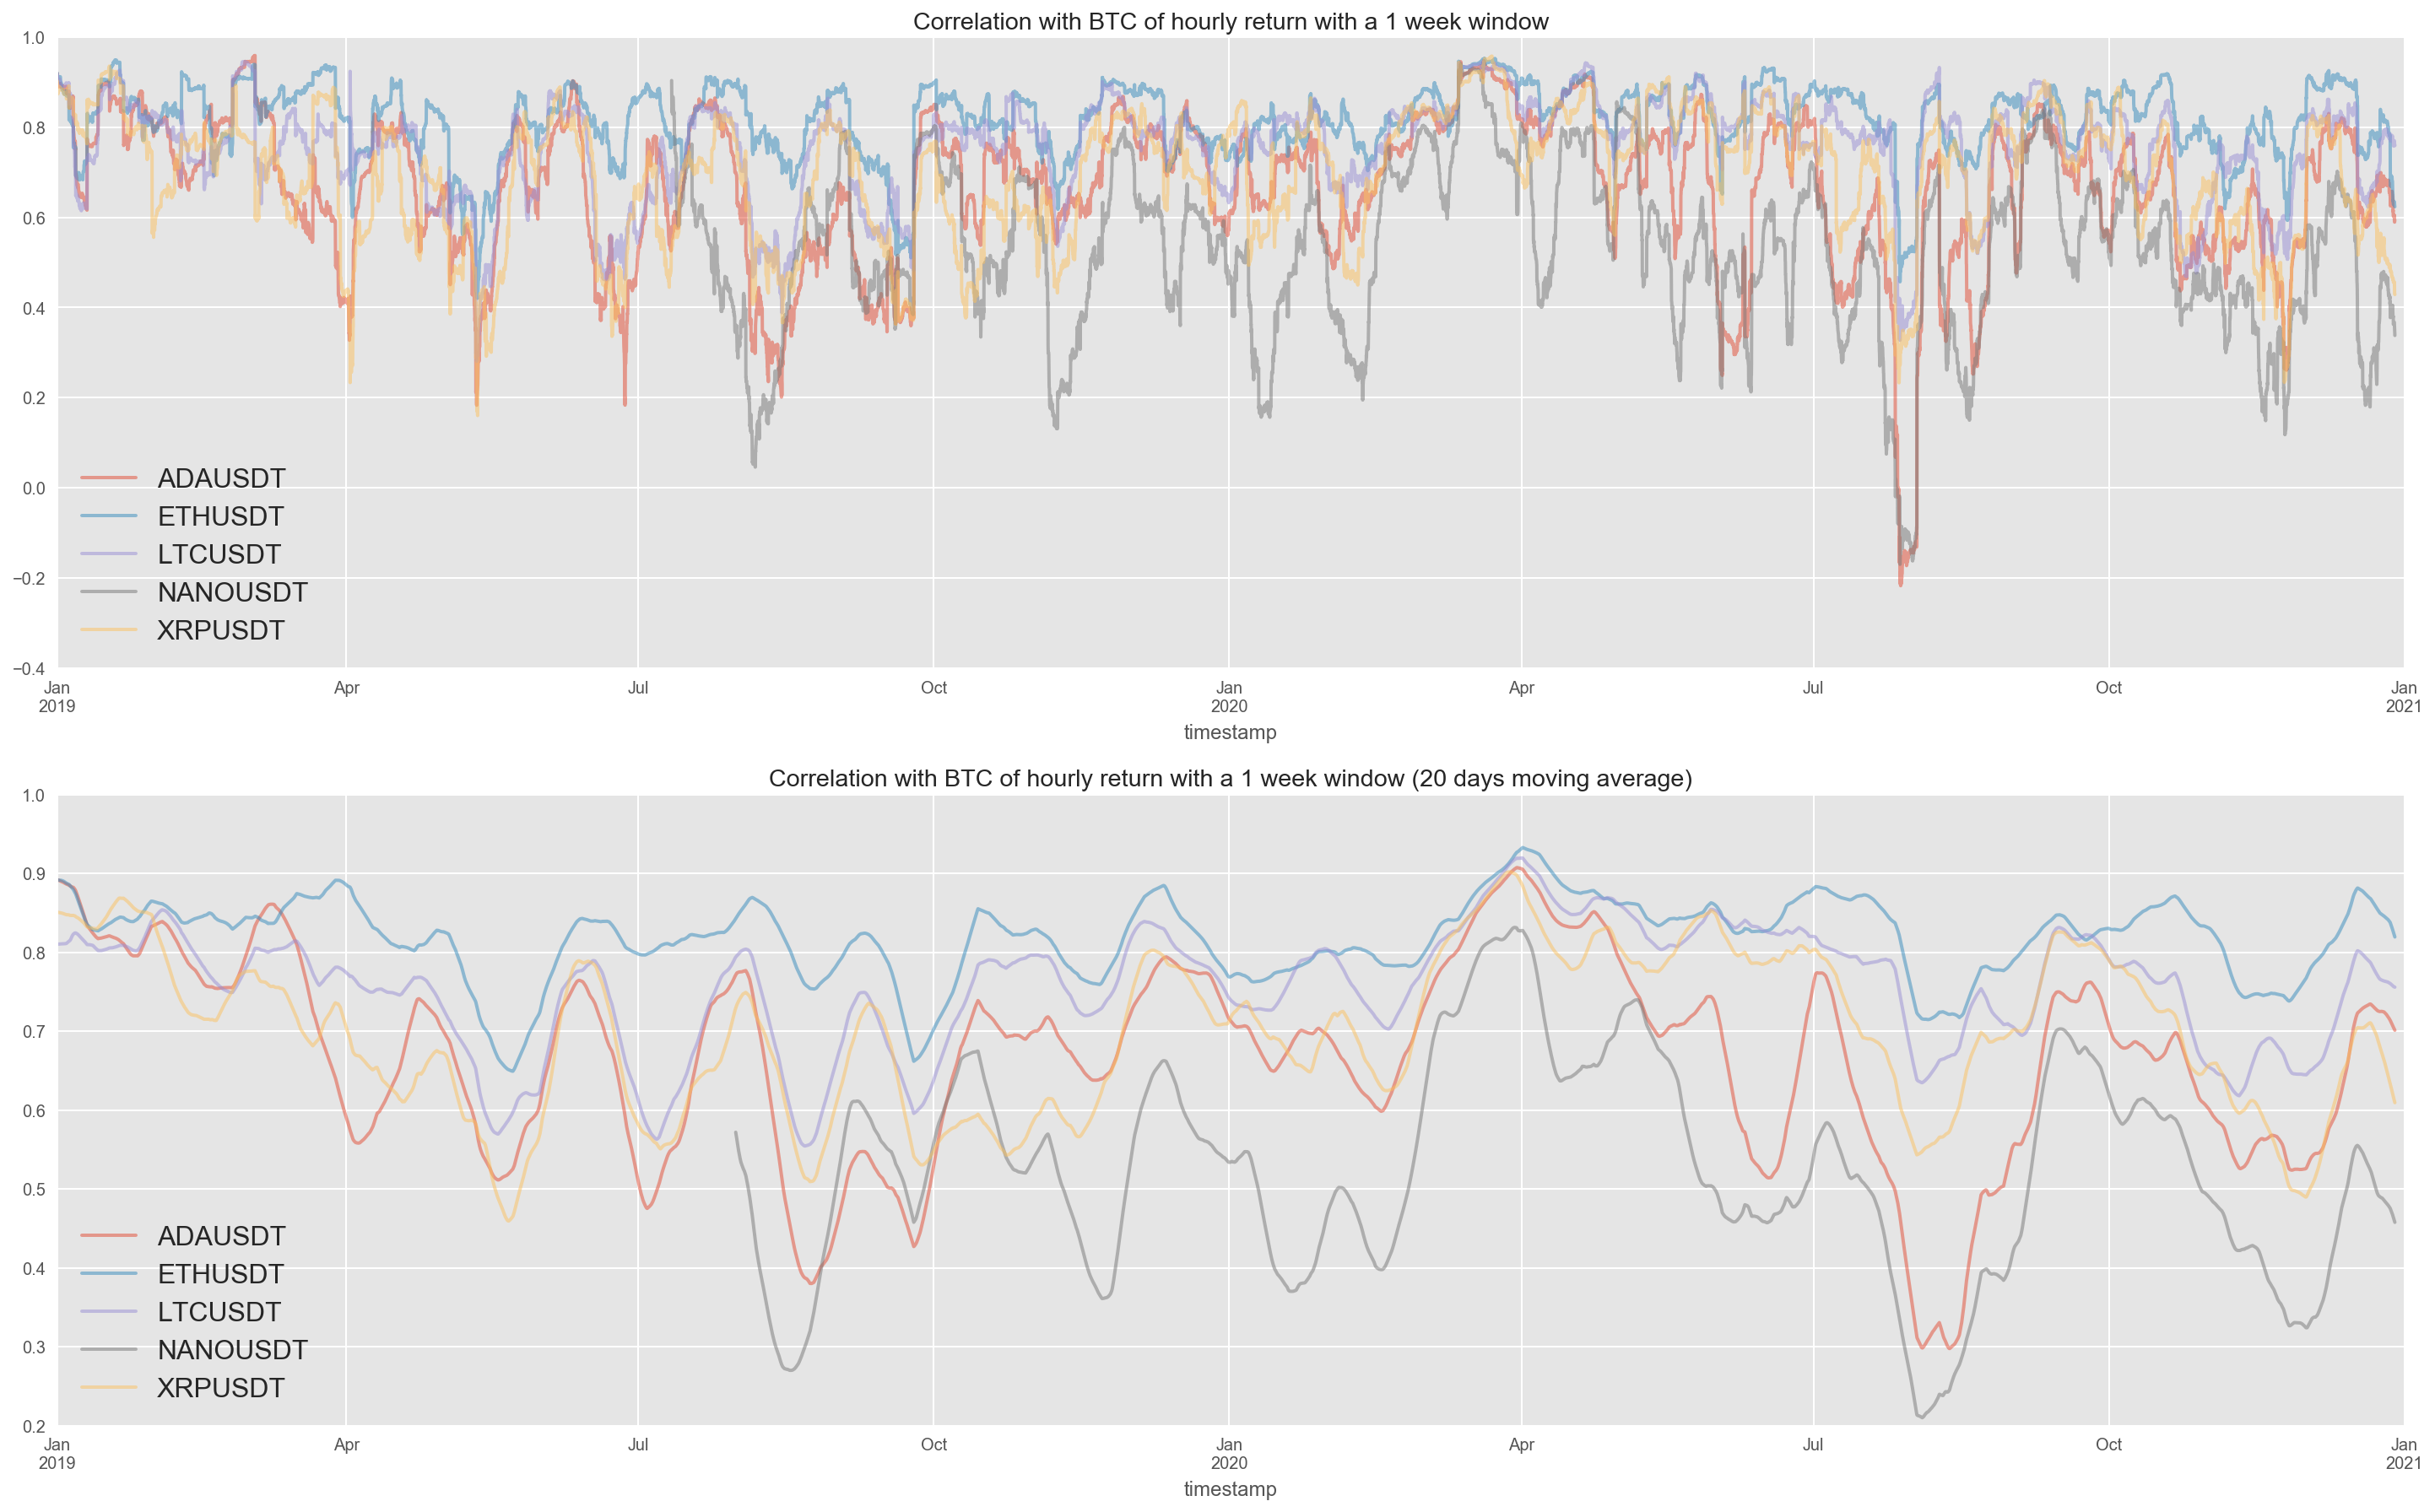

In [622]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
fig.tight_layout()

ts_corr = returns_1h.mid_return.rolling(window=24*7,min_periods=7).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.2)

title='Correlation with BTC of hourly return with a 1 week window_both'
#btc_corr.rolling(24*20).mean().plot(figsize=(25, 15), linewidth=2, alpha=0.5)
btc_corr.plot(legend=None, linewidth=2, alpha=0.5, ax=axs[0], title='Correlation with BTC of hourly return with a 1 week window')
btc_corr.rolling(24*20).mean().plot(linewidth=2, alpha=0.5, ax=axs[1], title='Correlation with BTC of hourly return with a 1 week window (20 days moving average)')
axs[0].set_xlim([datetime(2019, 1, 1), datetime(2021, 1, 1)])
axs[0].legend(loc=0, prop={'size': 16})
axs[1].set_xlim([datetime(2019, 1, 1), datetime(2021, 1, 1)])
axs[1].legend(loc=0, prop={'size': 16})

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

### Zoom in stable period lockdown

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2020-12-28 21:00:00  0.589602  0.517713  0.707484  0.292117  0.348722
2020-12-28 22:00:00  0.608420  0.714095  0.772475  0.444824  0.393571
2020-12-28 23:00:00  0.622089  0.702985  0.766456  0.357189  0.092342
2020-12-29 00:00:00  0.617979  0.706586  0.751262  0.359476  0.127338
2020-12-29 01:00:00  0.599935  0.699088  0.744615  0.314097  0.105018

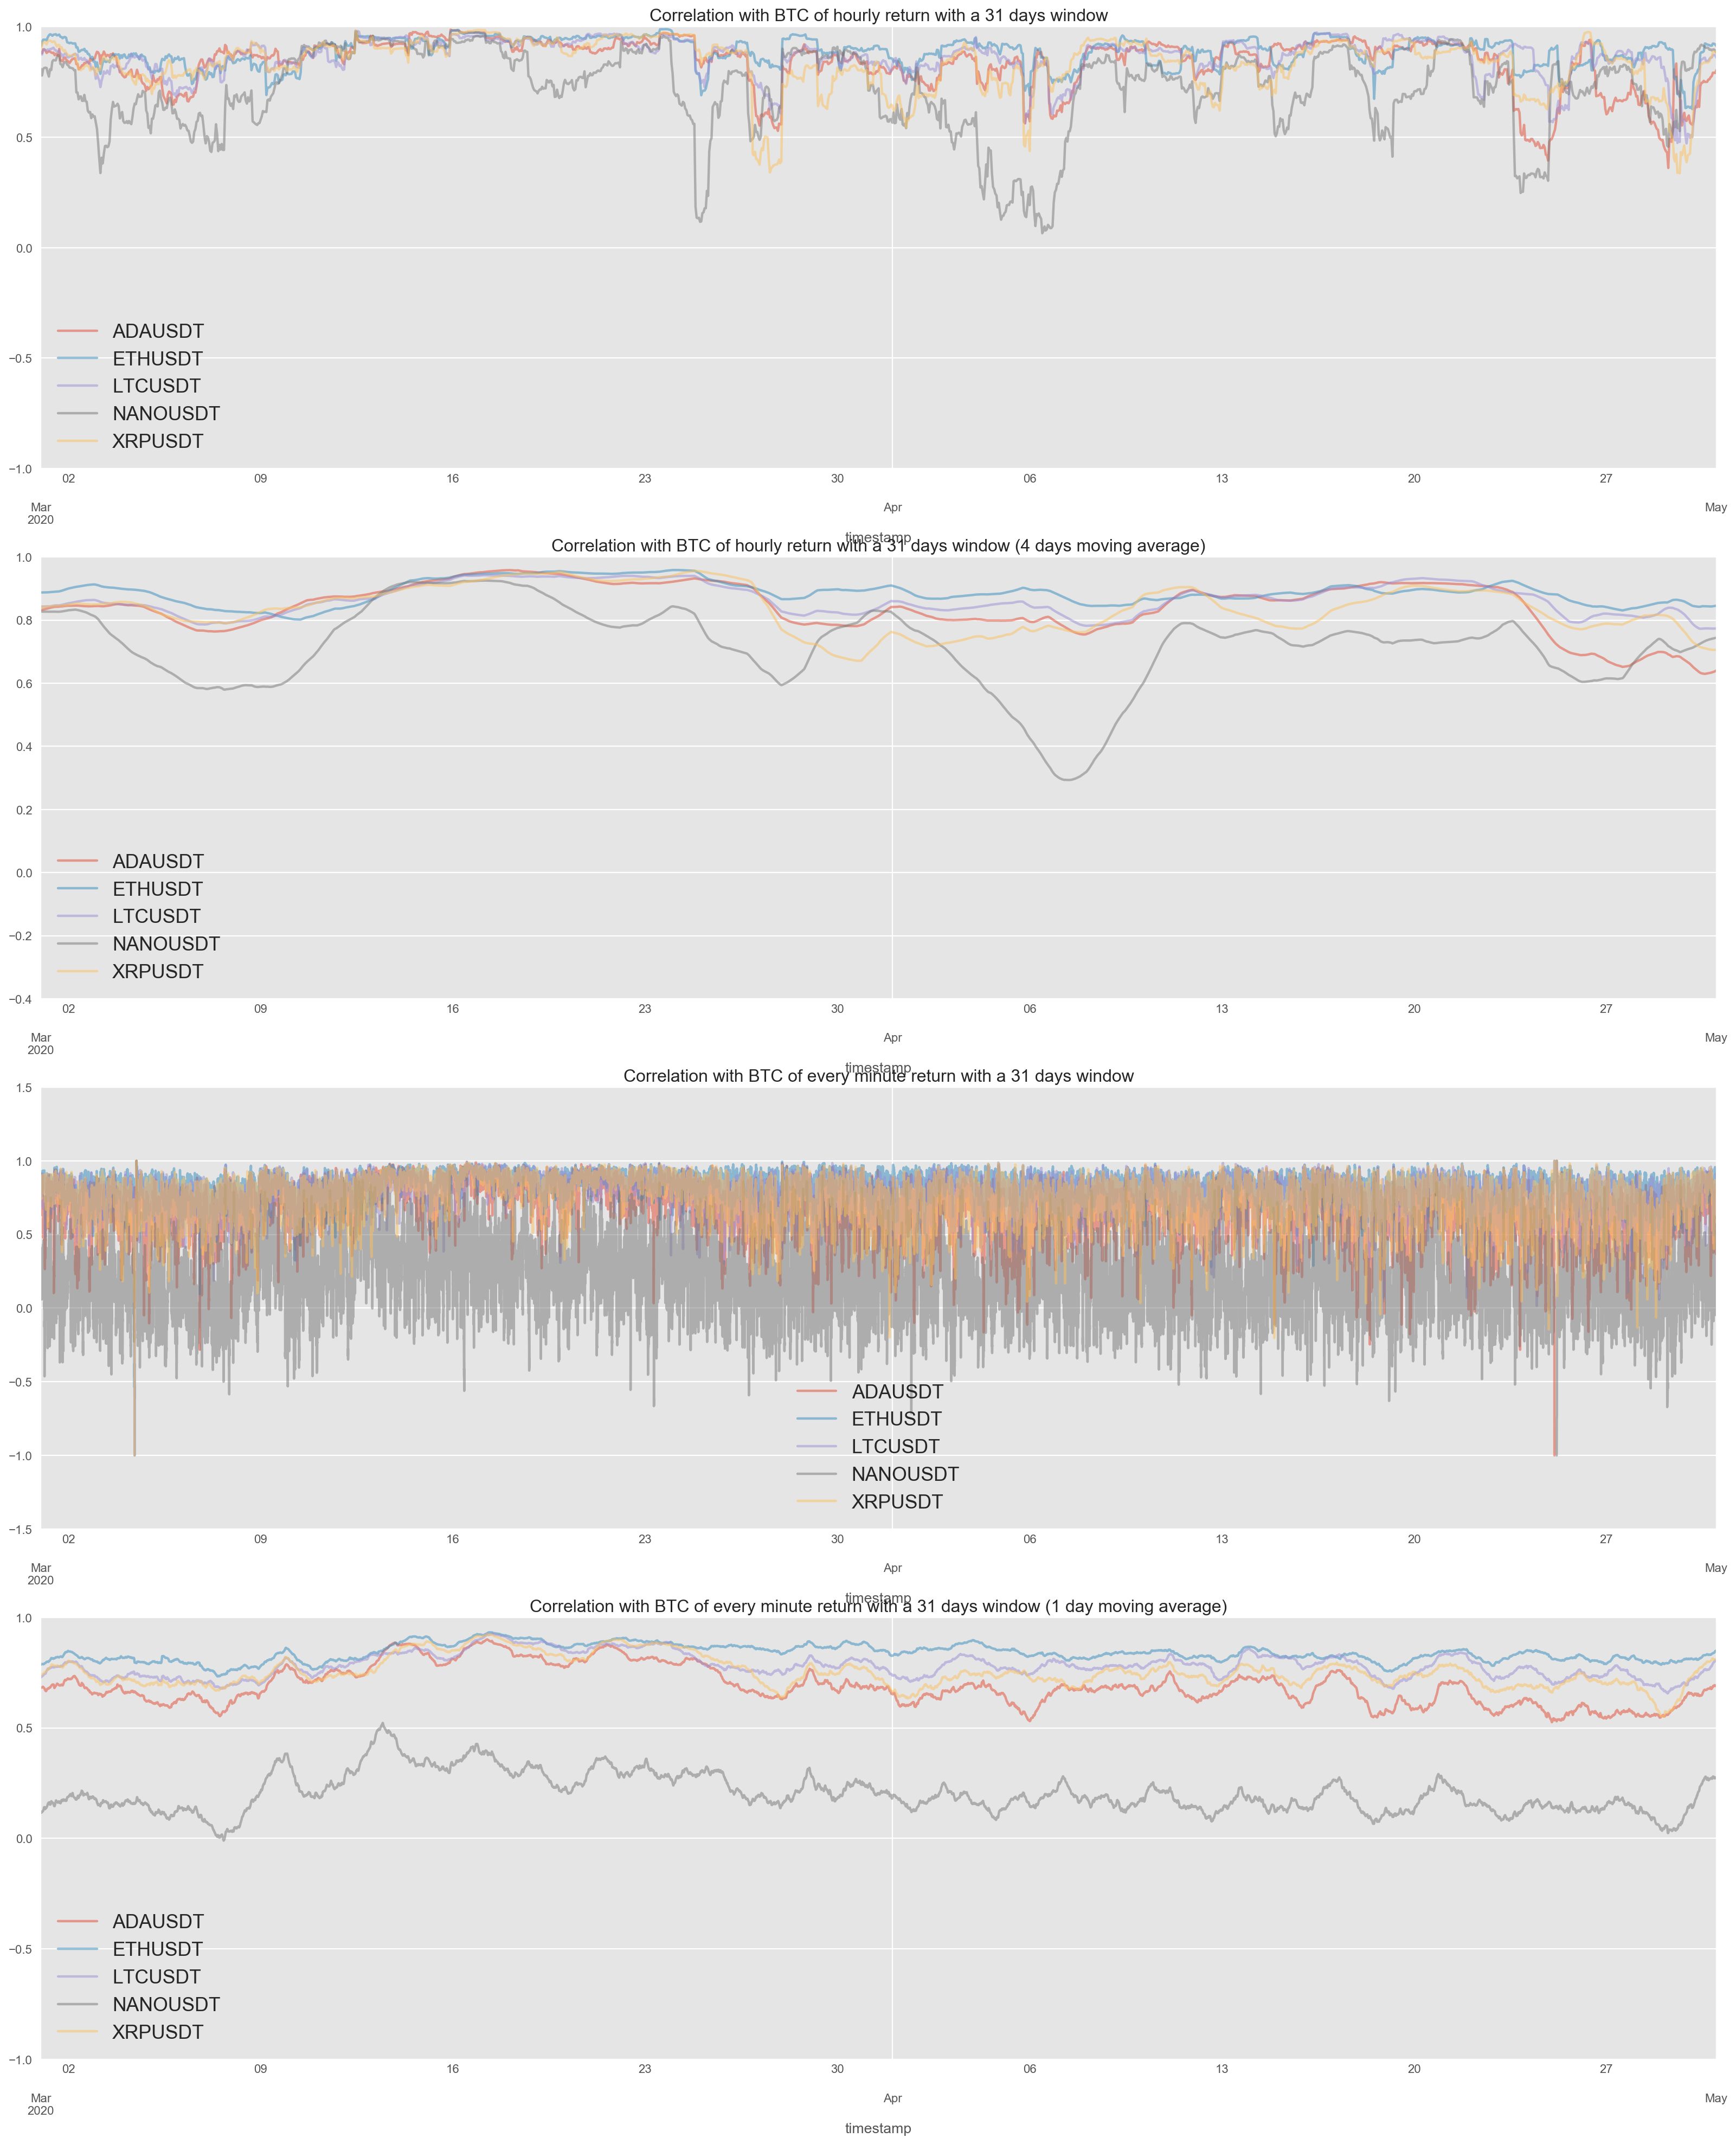

In [450]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20, 24))
fig.tight_layout()

ts_corr = returns_1h.mid_return.rolling(window=31,min_periods=2).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')
plt.subplots_adjust(hspace=0.2)

title='STABLE ZONE ANALYSIS'
btc_corr.plot(legend=None, linewidth=2, alpha=0.5, ax=axs[0], title='Correlation with BTC of hourly return with a 31 days window')
btc_corr.rolling(24*4).mean().plot(linewidth=2, alpha=0.5, ax=axs[1], title='Correlation with BTC of hourly return with a 31 days window (4 days moving average)')
axs[0].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[0].legend(loc=0, prop={'size': 16})
axs[1].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[1].legend(loc=0, prop={'size': 16})


ts_corr = returns_1m.mid_return.rolling(window=31,min_periods=2).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
btc_corr.plot(legend=None, linewidth=2, alpha=0.5, ax=axs[2], title='Correlation with BTC of every minute return with a 31 days window')
btc_corr.rolling(60*24*1, min_periods=1).mean().plot(linewidth=2, alpha=0.5, ax=axs[3], title='Correlation with BTC of every minute return with a 31 days window (1 day moving average)')
axs[2].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[2].legend(loc=0, prop={'size': 16})
axs[3].set_xlim([datetime(2020, 3, 1), datetime(2020, 5, 1)])
axs[3].legend(loc=0, prop={'size': 16})


#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()




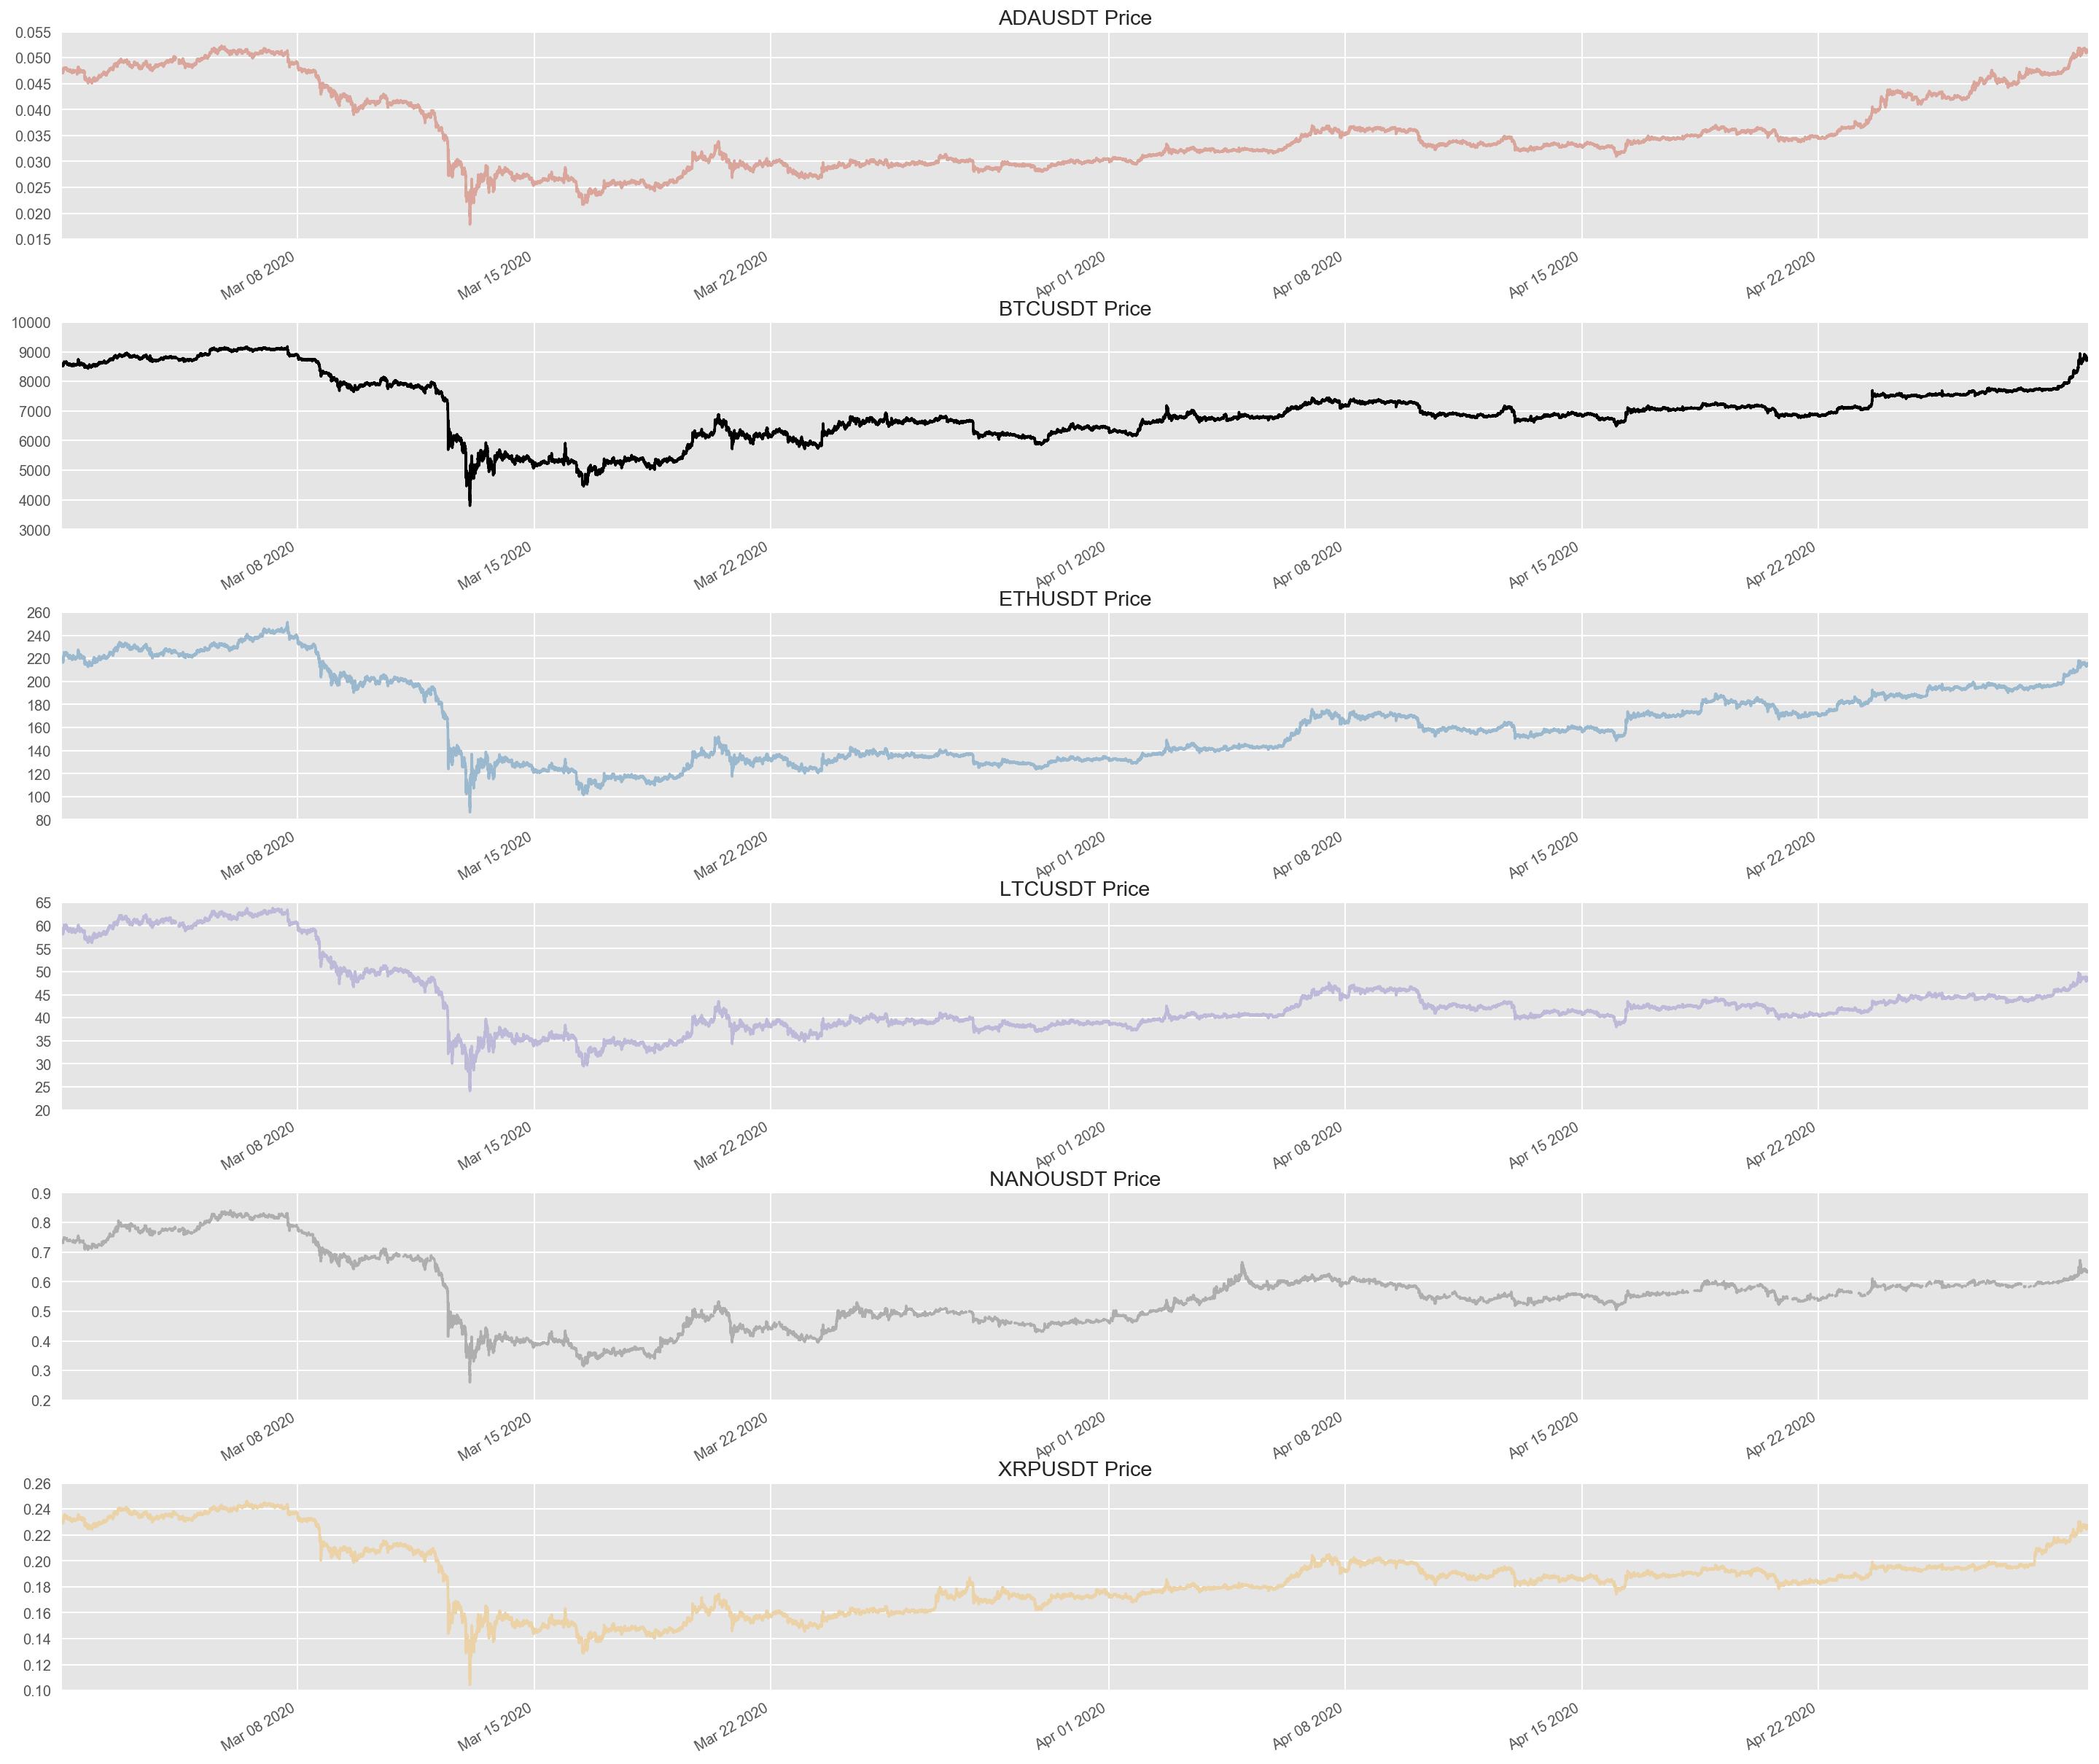

In [634]:
array = [datetime(2020, 3, 1, 0, 0, 30)+timedelta(seconds=i*30) for i in range(2*60*24*2*30)]
data_uncorr = data[data.index.isin(array, level=1)]
data_uncorr

fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
fig.tight_layout()

data_uncorr.mid_price.unstack(level=0).ADAUSDT.plot(grid=True, title='ADAUSDT Price', ax=axs[0], color=(218/255, 166/255, 156/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).BTCUSDT.plot(grid=True, title='BTCUSDT Price', ax=axs[1], color='black', xlabel='')
data_uncorr.mid_price.unstack(level=0).ETHUSDT.plot(grid=True, title='ETHUSDT Price', ax=axs[2], color=(154/255, 184/255, 206/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).LTCUSDT.plot(grid=True, title='LTCUSDT Price', ax=axs[3], color=(189/255, 186/255, 217/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).NANOUSDT.plot(grid=True, title='NANOUSDT Price', ax=axs[4], color=(174/255, 174/255, 174/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).XRPUSDT.plot(grid=True, title='XRPUSDT Price', ax=axs[5], color=(235/255, 210/255, 167/255), xlabel='')
plt.subplots_adjust(hspace =0.4)

title='STABLE ZONE ANALYSIS - b'

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

### Zoom in crash period summer 2020

Symbol                ADAUSDT   ETHUSDT   LTCUSDT  NANOUSDT   XRPUSDT
timestamp                                                            
2020-12-28 23:58:00 -0.673365 -0.253019 -0.751479 -0.289846 -0.789471
2020-12-28 23:58:30  0.096751 -0.524908 -0.322313 -0.885113 -0.038560
2020-12-28 23:59:00  0.749980  0.318044  0.755306 -0.231851  0.596603
2020-12-28 23:59:30  0.640068  0.182057  0.594051 -0.773098  0.511071
2020-12-29 00:00:00  0.592751  0.890117  0.559908 -0.961163 -0.668995

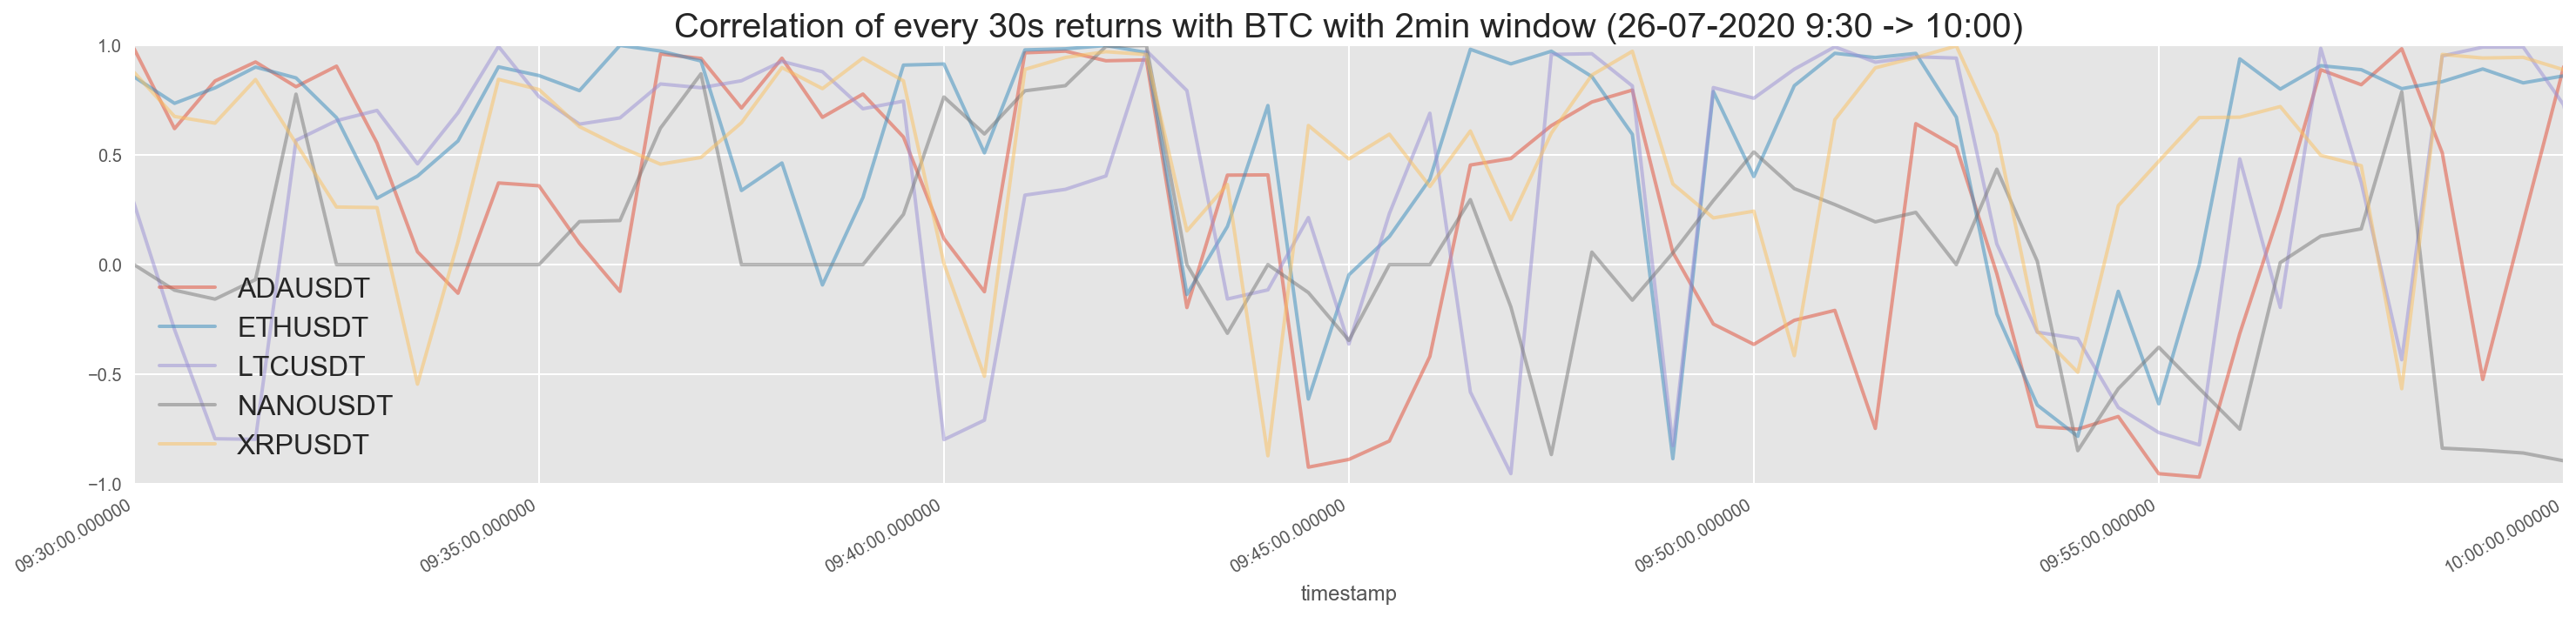

In [628]:
ts_corr = returns_30s.mid_return.rolling(window=4,min_periods=4).corr()#.dropna()

#Keep rows corr with BTC and suppress index
btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop('BTCUSDT', axis=1)#.dropna()
display(btc_corr.tail())

plt.style.use('ggplot')

title='Correlation of every 30s returns with BTC with 2min window (26-07-2020 9:30 -> 10:00)'
#btc_corr.rolling(window=30,min_periods=4).mean().plot(figsize=(25, 15), linewidth=2, alpha=0.5)
btc_corr.plot(figsize=(25, 5), linewidth=2, alpha=0.5)
plt.title(title, fontsize=20)
plt.legend(loc=0, prop={'size': 16})
plt.xlim(left=datetime(2020, 7, 26, 9, 30), right=datetime(2020, 7, 26, 10))

plt.ylim(-1, 1)
#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

In [632]:
array = [datetime(2020, 7, 25)+timedelta(seconds=i*30) for i in range(2*60*24*3)]
data_uncorr = data[data.index.isin(array, level=1)]
data_uncorr

nb_trade  min_price  max_price  mid_price  \
        timestamp                                                        
ADAUSDT 2020-07-25 00:00:00        17    0.12195    0.12204   0.122000   
        2020-07-25 00:00:30        46    0.12195    0.12223   0.122087   
        2020-07-25 00:01:00        58    0.12214    0.12226   0.122206   
        2020-07-25 00:01:30        27    0.12220    0.12228   0.122245   
        2020-07-25 00:02:00        42    0.12225    0.12232   0.122275   
...                               ...        ...        ...        ...   
XRPUSDT 2020-07-27 23:57:30        54    0.22369    0.22393   0.223861   
        2020-07-27 23:58:00        50    0.22355    0.22399   0.223866   
        2020-07-27 23:58:30        38    0.22397    0.22430   0.224128   
        2020-07-27 23:59:00        35    0.22421    0.22435   0.224294   
        2020-07-27 23:59:30        42    0.22422    0.22455   0.224329   

                             volume_tot  mid_price_return  \
        timestamp                                           
ADAUSDT 2020-07-25 00:00:00     70581.6          0.000498   
        2020-07-25 00:00:30    174604.7          0.000712   
        2020-07-25 00:01:00    221654.3          0.000973   
        2020-07-25 00:01:30     86182.4          0.000321   
        2020-07-25 00:02:00    139842.0          0.000244   
...                                 ...               ...   
XRPUSDT 2020-07-27 23:57:30    152825.8          0.000471   
        2020-07-27 23:58:00    183329.2          0.000021   
        2020-07-27 23:58:30     62069.4          0.001170   
        2020-07-27 23:59:00     36978.1          0.000742   
        2020-07-27 23:59:30     60286.1          0.000158   

                             mid_price_log_return  
        timestamp                                  
ADAUSDT 2020-07-25 00:00:00              0.000497  
        2020-07-25 00:00:30              0.000712  
        2020-07-25 00:01:00              0.000973  
        2020-07-25 00:01:30              0.000321  
        2020-07-25 00:02:00              0.000244  
...                                           ...  
XRPUSDT 2020-07-27 23:57:30              0.000471  
        2020-07-27 23:58:00              0.000021  
        2020-07-27 23:58:30              0.001169  
        2020-07-27 23:59:00              0.000742  
        2020-07-27 23:59:30              0.000158  

[46210 rows x 7 columns]

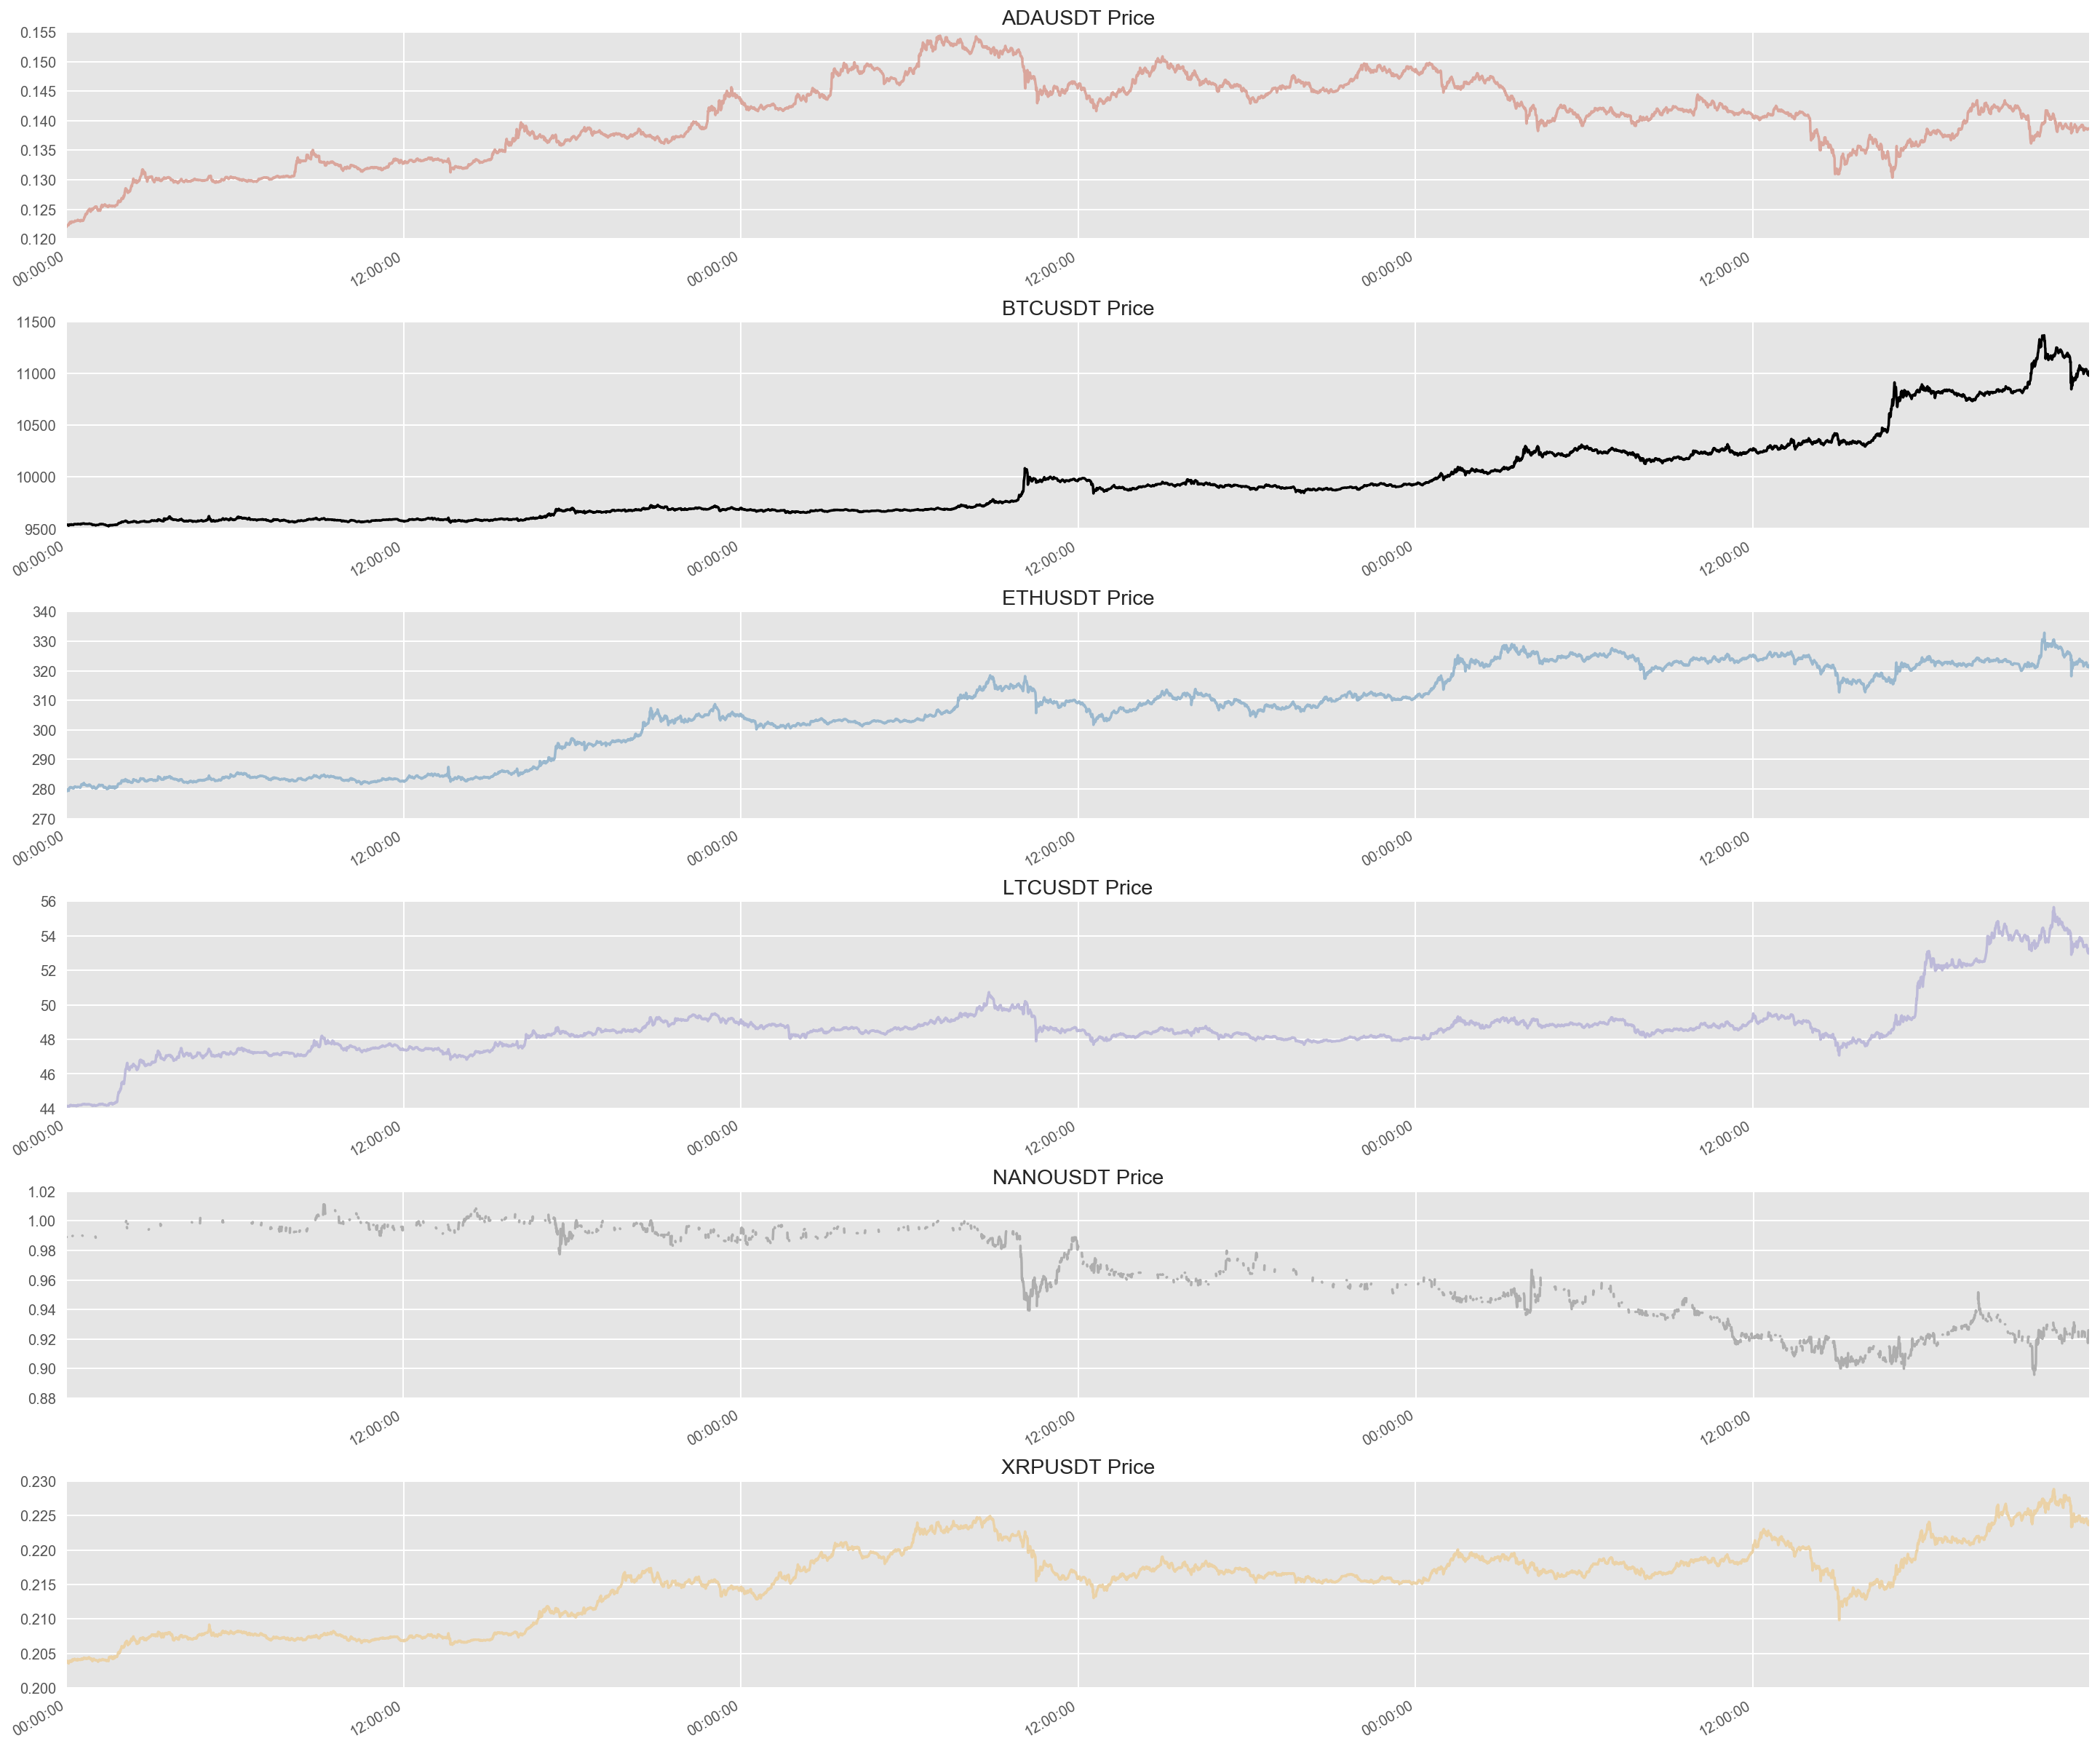

In [633]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(20, 20))
fig.tight_layout()

data_uncorr.mid_price.unstack(level=0).ADAUSDT.plot(grid=True, title='ADAUSDT Price', ax=axs[0], color=(218/255, 166/255, 156/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).BTCUSDT.plot(grid=True, title='BTCUSDT Price', ax=axs[1], color='black', xlabel='')
data_uncorr.mid_price.unstack(level=0).ETHUSDT.plot(grid=True, title='ETHUSDT Price', ax=axs[2], color=(154/255, 184/255, 206/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).LTCUSDT.plot(grid=True, title='LTCUSDT Price', ax=axs[3], color=(189/255, 186/255, 217/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).NANOUSDT.plot(grid=True, title='NANOUSDT Price', ax=axs[4], color=(174/255, 174/255, 174/255), xlabel='')
data_uncorr.mid_price.unstack(level=0).XRPUSDT.plot(grid=True, title='XRPUSDT Price', ax=axs[5], color=(235/255, 210/255, 167/255), xlabel='')
plt.subplots_adjust(hspace =0.4)

title='CRASH ZONE ANALYSIS - b'

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

In [488]:
data.index.get_level_values(1)

DatetimeIndex(['2018-07-25 00:00:30', '2018-07-25 00:01:00',
               '2018-07-25 00:01:30', '2018-07-25 00:02:00',
               '2018-07-25 00:02:30', '2018-07-25 00:03:00',
               '2018-07-25 00:03:30', '2018-07-25 00:04:00',
               '2018-07-25 00:04:30', '2018-07-25 00:05:00',
               ...
               '2020-12-28 23:55:30', '2020-12-28 23:56:00',
               '2020-12-28 23:56:30', '2020-12-28 23:57:00',
               '2020-12-28 23:57:30', '2020-12-28 23:58:00',
               '2020-12-28 23:58:30', '2020-12-28 23:59:00',
               '2020-12-28 23:59:30', '2020-12-29 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=14407623, freq=None)

### Daily return correlation in function of the window size 

In [591]:
def create_df_windows(df, symbols, symbol):
    symbols_del = symbols.copy()
    symbols_del.remove(symbol)
    ts_corr = df.rolling(window=7,min_periods=7).corr()
    coin_btc_corr = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop(symbols_del, axis=1)
    win_size = [10]
    for i in range(30, 365, 20):
        ts_corr = df.rolling(window=i,min_periods=7).corr()
        a = ts_corr.loc[ts_corr.index.get_level_values(1) == 'BTCUSDT' ].reset_index(level=1, drop=True).drop(symbols_del, axis=1)
        coin_btc_corr = pd.concat([coin_btc_corr, a], axis=1)
        win_size.append(i)
    coin_btc_corr.columns = win_size
    return coin_btc_corr, win_size
    
ETH_btc_corr,win_size = create_df_windows(returns_1d.mid_return, symbols, 'ETHUSDT')
ETH_btc_corr.tail(2)

10        30        50        70        90        110  \
timestamp                                                                
2020-12-29  0.366482  0.757004  0.706618  0.668490  0.677026  0.682587   
2020-12-30  0.362818  0.767768  0.704162  0.673072  0.677112  0.685234   

                 130       150       170       190       210       230  \
timestamp                                                                
2020-12-29  0.716488  0.711016  0.686096  0.697503  0.706199  0.718178   
2020-12-30  0.713031  0.709738  0.686205  0.694629  0.705293  0.716476   

                 250       270       290       310       330       350  
timestamp                                                               
2020-12-29  0.728021  0.749976  0.780854  0.853905  0.847089  0.848461  
2020-12-30  0.729893  0.750048  0.777395  0.853689  0.847159  0.846286

In [602]:
symbs, dfs = [], []

for symbol in symbols:
    if symbol != 'BTCUSDT':
        symbs.append(symbol[:-4])
        df, win_size = create_df_windows(returns_1d.mid_return, symbols, symbol)
        dfs.append(df)

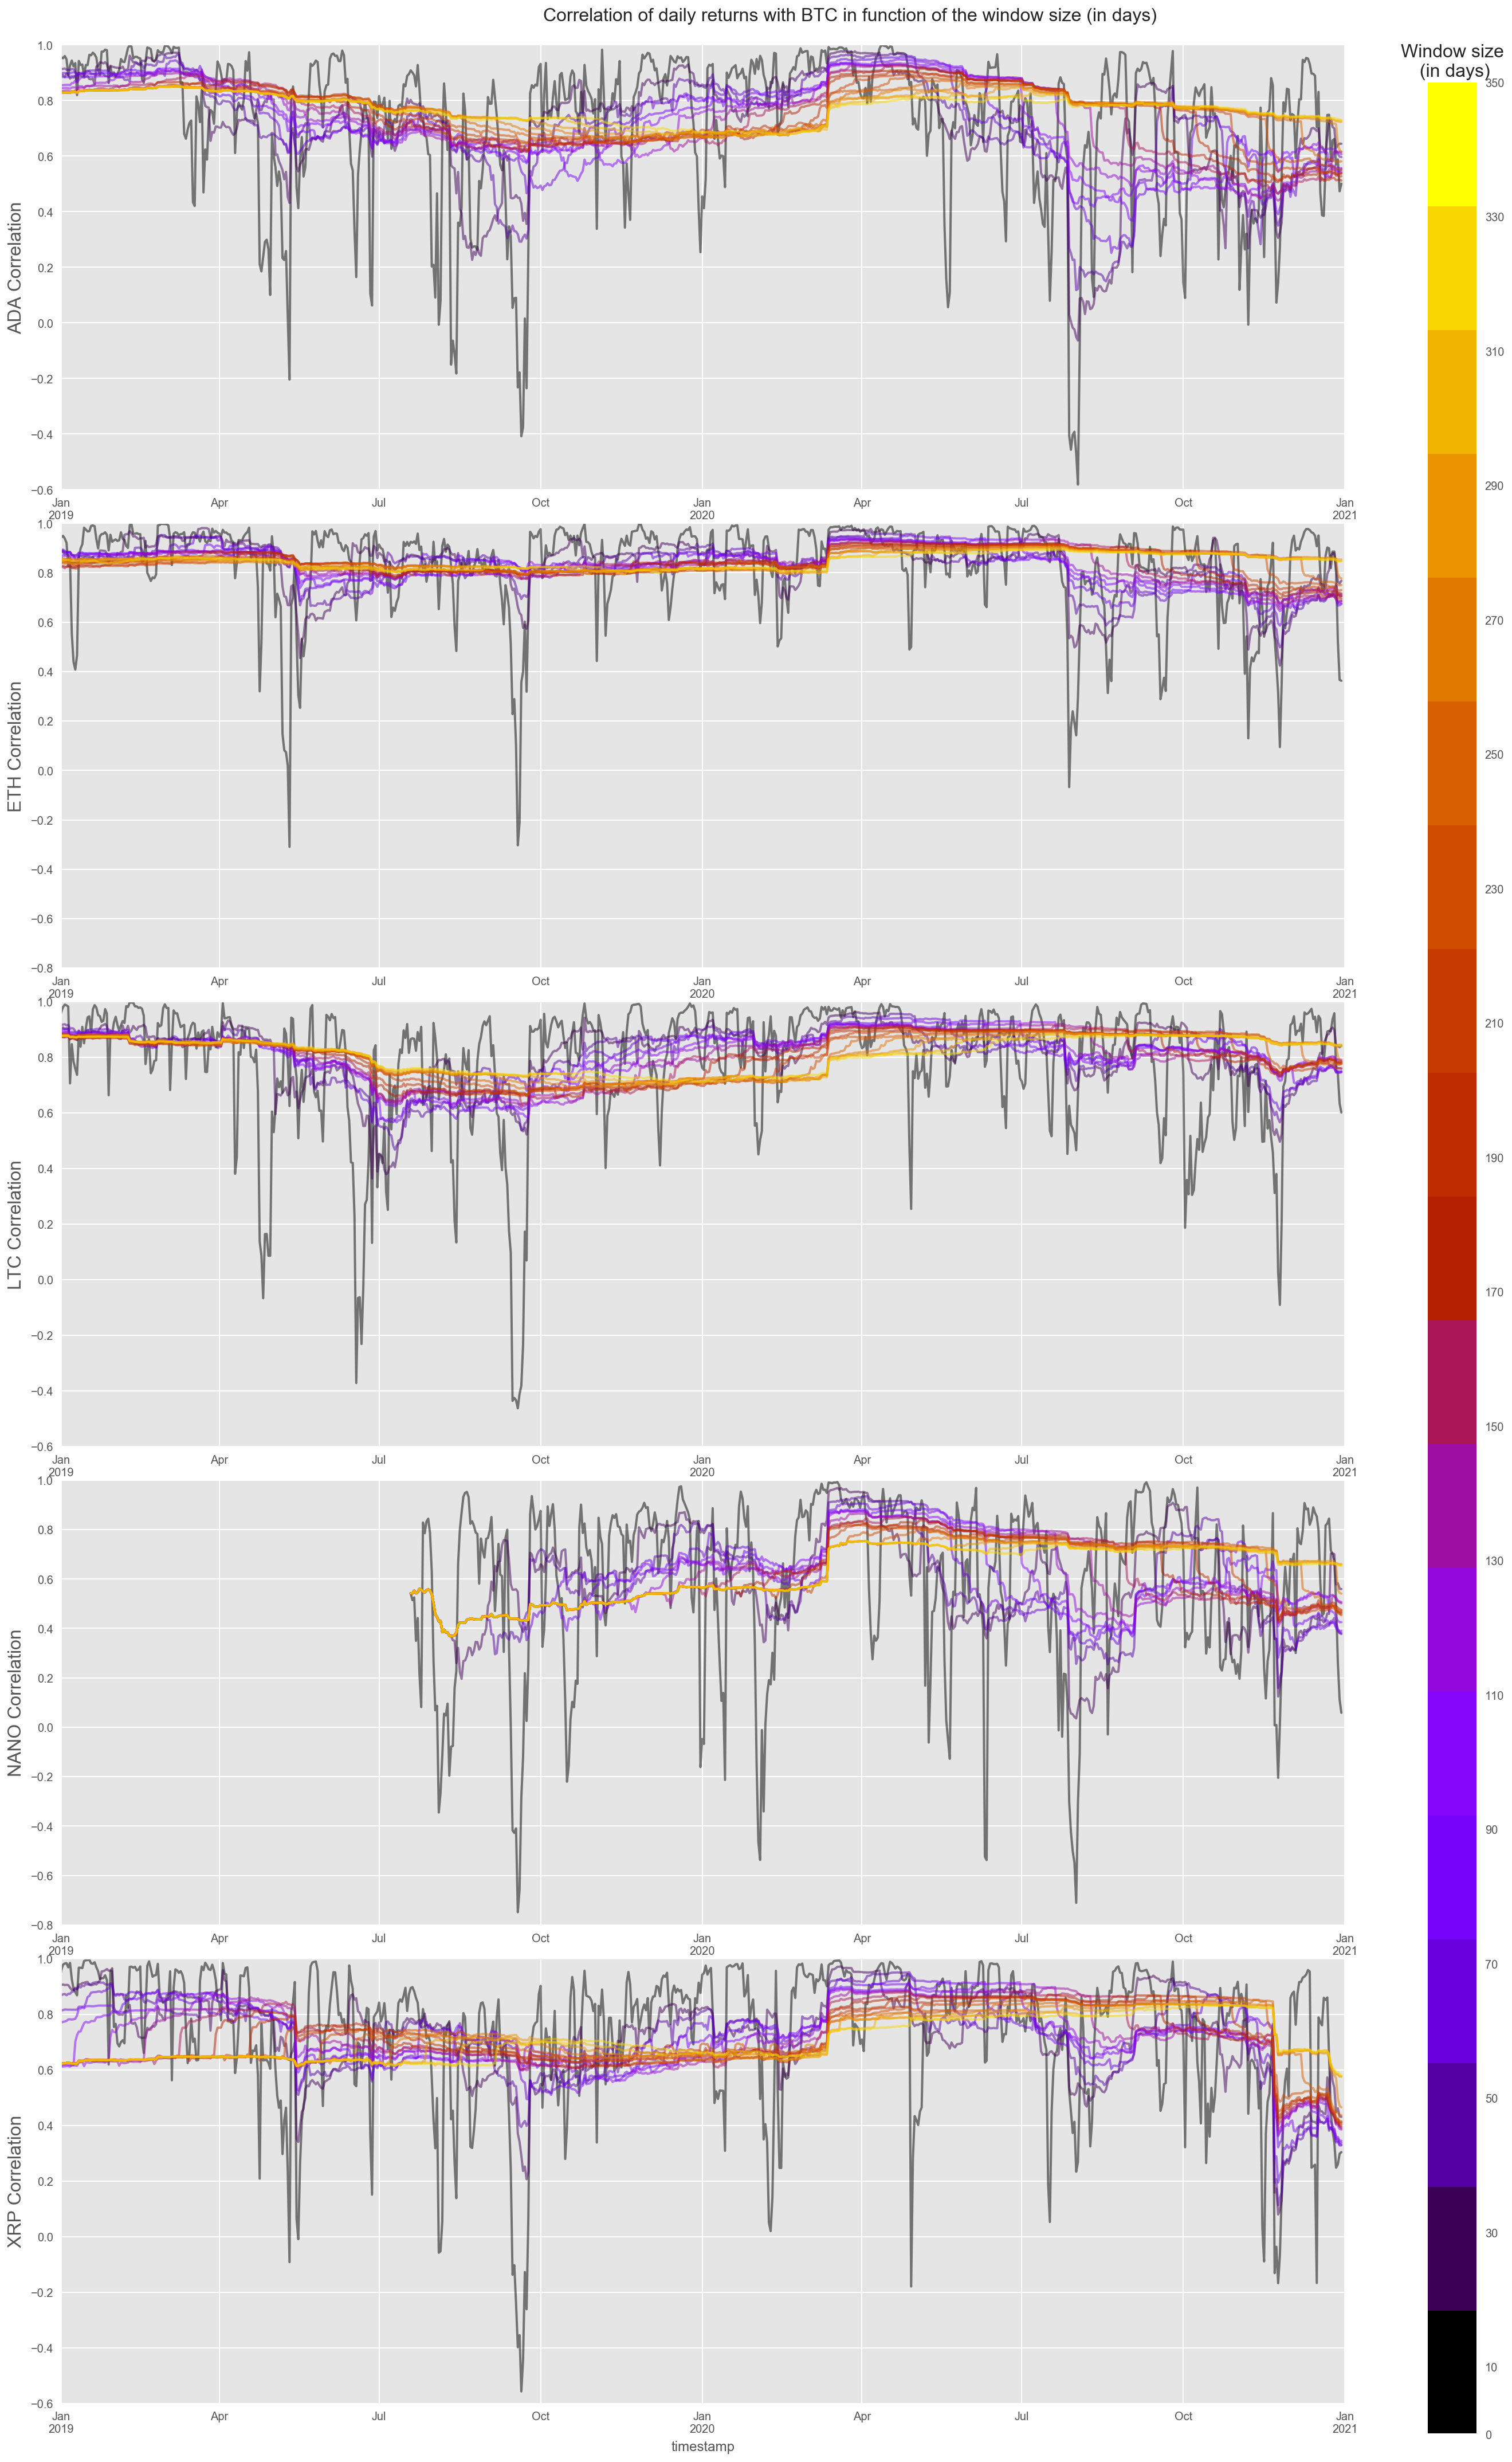

In [604]:
# setup the normalization and the colormap
normalize = mpl.colors.Normalize(min(win_size), max(win_size))
#colormap = plt.cm.gnuplot
colormap = cm.get_cmap('gnuplot', len(win_size)) 
color = plt.cm.gnuplot(np.linspace(0, 1,len(win_size)))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(20, 30))
fig.tight_layout()

for i in range(len(axs)):
    dfs[i].plot(linewidth=2, alpha=0.5, legend=None, ax=axs[i])
    axs[i].set_ylabel(symbs[i]+' Correlation', fontsize=16)
    axs[i].set_xlim(left=datetime(2019, 1, 1), right=datetime(2021, 1, 1))
    

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(win_size)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0, 0.03, 0.95])
clb = fig.colorbar(scalarmappaple, cax=cbar_ax, ticks=win_size)
clb.ax.set_title('Window size\n (in days)', fontsize=16)

title = 'Correlation of daily returns with BTC in function of the window size (in days)'
fig.suptitle(title, fontsize=16)
plt.subplots_adjust(top =0.965)

#plt.savefig('images/correlations/'+title+'.png', dpi=300)
plt.show()

### Hayashi and Yoshida Covariance 2020

In [5]:
symbols_no_btc = ['ADAUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']
symbols

['ADAUSDT', 'BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']

In [ ]:
#save 2020 data only
if True:
    symbol = 'LTCUSDT'
    symb = symbol[:-4]

    df = pd.read_parquet('data.nosync/_all/'+symbol+'.pq')
    df = df[(df.index>=datetime(2020,1,1))]  
    df = df.astype({'price': 'float'})
    df = df[df.is_trade_best_price==True]
    df.drop(columns='is_trade_best_price', inplace=True)

    #group same transactions
    df = df.groupby(df.index).agg({'price':'mean'}).reset_index()
    df.columns = df.columns.get_level_values(0)
    df.index = df.timestamp

    #compute the return
    df['return_'+symb] = df.price.pct_change()
    df.drop(columns=['timestamp', 'price'], inplace=True)

    df.to_parquet(f'data.nosync/_2020/{symbol}.pq')

In [15]:
btc = pd.read_parquet('data.nosync/_2020/BTCUSDT.pq')
btc

return_BTC
timestamp                            
2020-01-01 00:00:00.594           NaN
2020-01-01 00:00:00.862  1.403706e-04
2020-01-01 00:00:00.998  0.000000e+00
2020-01-01 00:00:01.503 -1.389613e-04
2020-01-01 00:00:01.660  1.362010e-04
...                               ...
2020-12-28 23:59:59.209  3.692840e-07
2020-12-28 23:59:59.246 -3.692839e-07
2020-12-28 23:59:59.439 -3.692840e-07
2020-12-28 23:59:59.714  8.000646e+00
2020-12-28 23:59:59.948 -8.888969e-01

[186046815 rows x 1 columns]

In [ ]:
dfs = []
for symbol in symbols_no_btc:
    symb = symbol[:-4]
    print(symb, end=' ')
    df = pd.read_parquet('data.nosync/_2020/'+symbol+'.pq')
    
    # cut BTC until a trade arise in the other crypto (since first 2020 trade was BTC)
    btc = btc[(btc.index>=df.index[0])]  
    
    MERGE = pd.concat([df, btc], axis=1)
    MERGE.columns = ['return_'+symb, 'return_BTC']
    MERGE['return_'+symb].fillna(MERGE['return_BTC'], inplace=True)
    MERGE['return_BTC'].fillna(MERGE['return_'+symb], inplace=True)
    MERGE.dropna(inplace=True)
    dfs.append(MERGE)

ADA 

In [700]:
symbol = 'NANOUSDT'
symb = symbol[:-4]

df = pd.read_parquet('data.nosync/_all/'+symbol+'.pq')
df = df.astype({'volume': 'float', 'price': 'float'})
df = df[df.is_trade_best_price==True]
df.drop(columns='is_trade_best_price', inplace=True)
df = df[(df.index>=datetime(2020,1,1))]  
df

trade_id   price  volume  first_id  last_id  \
timestamp                                                              
2020-01-01 00:02:46.350    864292  0.6508   16.00    952968   952968   
2020-01-01 00:07:17.994    864293  0.6547   30.51    952969   952969   
2020-01-01 00:24:52.849    864294  0.6511  159.53    952970   952970   
2020-01-01 00:24:52.857    864295  0.6511  111.67    952971   952971   
2020-01-01 00:24:53.877    864296  0.6511   77.51    952972   952972   
...                           ...     ...     ...       ...      ...   
2020-12-28 23:58:52.749   2402376  1.0713  231.94   2773036  2773037   
2020-12-28 23:58:55.152   2402377  1.0700   25.00   2773038  2773038   
2020-12-28 23:59:33.393   2402378  1.0720   65.75   2773039  2773039   
2020-12-28 23:59:33.393   2402379  1.0721  134.25   2773040  2773040   
2020-12-28 23:59:35.823   2402380  1.0721   69.52   2773041  2773042   

                         is_buyer_maker  
timestamp                                
2020-01-01 00:02:46.350            True  
2020-01-01 00:07:17.994            True  
2020-01-01 00:24:52.849           False  
2020-01-01 00:24:52.857           False  
2020-01-01 00:24:53.877           False  
...                                 ...  
2020-12-28 23:58:52.749            True  
2020-12-28 23:58:55.152            True  
2020-12-28 23:59:33.393           False  
2020-12-28 23:59:33.393           False  
2020-12-28 23:59:35.823           False  

[1538089 rows x 6 columns]

Process

In [701]:
df_TEST = df[(df.index<=datetime(2020, 1, 1, 0, 7, 20))]  
df_TEST = df_TEST.groupby(df_TEST.index).agg({'price':'sum'}).reset_index()
df_TEST.columns = df_TEST.columns.get_level_values(0)
df_TEST.index = df_TEST.timestamp
df_TEST['return_'+symb] = df_TEST.price.pct_change()
df_TEST.drop(columns=['timestamp', 'price'], inplace=True)
df_TEST

return_NANO
timestamp                           
2020-01-01 00:02:46.350          NaN
2020-01-01 00:07:17.994     0.005993

In [692]:
btc_TEST = btc[(btc.index<=datetime(2020, 1, 1, 0, 7, 20))]  
btc_TEST = btc_TEST.groupby(btc_TEST.index).agg({'price':'sum'}).reset_index()
btc_TEST.columns = btc_TEST.columns.get_level_values(0)
btc_TEST.index = btc_TEST.timestamp
btc_TEST['return_'+symb] = btc_TEST.price.pct_change()
btc_TEST.drop(columns=['timestamp', 'price'], inplace=True)
btc_TEST

return
timestamp                        
2020-01-01 00:02:46.711       NaN
2020-01-01 00:02:47.340 -0.000103
2020-01-01 00:02:49.151  0.000103
2020-01-01 00:02:49.539  2.999513
2020-01-01 00:02:49.725 -0.500017
...                           ...
2020-01-01 00:07:18.586 -0.000036
2020-01-01 00:07:18.818  0.000015
2020-01-01 00:07:19.148 -0.000026
2020-01-01 00:07:19.454  0.000132
2020-01-01 00:07:19.478  0.999717

[474 rows x 1 columns]

In [702]:
MERGE = pd.concat([df_TEST, btc_TEST], axis=1)
MERGE.columns = ['return_'+symb, 'return_BTC']
MERGE['return_'+symb].fillna(MERGE['return_BTC'], inplace=True)
MERGE['return_BTC'].fillna(MERGE['return_'+symb], inplace=True)
MERGE.dropna(inplace=True)
MERGE

return_NANO  return_BTC
timestamp                                       
2020-01-01 00:02:47.340    -0.000103   -0.000103
2020-01-01 00:02:49.151     0.000103    0.000103
2020-01-01 00:02:49.539     2.999513    2.999513
2020-01-01 00:02:49.725    -0.500017   -0.500017
2020-01-01 00:02:50.056    -0.500002   -0.500002
...                              ...         ...
2020-01-01 00:07:18.586    -0.000036   -0.000036
2020-01-01 00:07:18.818     0.000015    0.000015
2020-01-01 00:07:19.148    -0.000026   -0.000026
2020-01-01 00:07:19.454     0.000132    0.000132
2020-01-01 00:07:19.478     0.999717    0.999717

[474 rows x 2 columns]

In [698]:
symbols_no_btc = ['ADAUSDT', 'ETHUSDT', 'LTCUSDT', 'NANOUSDT', 'XRPUSDT']

In [706]:
symbol = 'XRPUSDT'
symb = symbol[:-4]

dii = pd.read_parquet('data.nosync/_all/'+symbol+'.pq')
dii = dii.astype({'volume': 'float', 'price': 'float'})
dii = dii[dii.is_trade_best_price==True]
dii.drop(columns='is_trade_best_price', inplace=True)
dii = dii[(dii.index>=datetime(2020,1,1))]  
dii.head()

trade_id    price  volume  first_id   last_id  \
timestamp                                                                
2020-01-01 00:00:00.247  38224799  0.19285   118.9  42826986  42826986   
2020-01-01 00:00:00.247  38224800  0.19284    48.1  42826987  42826987   
2020-01-01 00:00:01.988  38224801  0.19284   120.0  42826988  42826988   
2020-01-01 00:00:02.139  38224802  0.19295   118.9  42826989  42826990   
2020-01-01 00:00:03.822  38224803  0.19284    91.0  42826991  42826992   

                         is_buyer_maker  
timestamp                                
2020-01-01 00:00:00.247            True  
2020-01-01 00:00:00.247            True  
2020-01-01 00:00:01.988            True  
2020-01-01 00:00:02.139           False  
2020-01-01 00:00:03.822            True